# Project: Investigate 'TMDB Movies' Dataset 

### Submitted By: Muhammad Asim Noor


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#uf">Utility Functions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>Following is the description of the dataset as provided in the Udacity Document:
>
> "_This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue_"
><ul>
><li> "Certain columns, like ‘cast’ and ‘genres’, contain multiplevalues separated by pipe (|) characters </li>
><li> There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is</li>
><li> The final two columns ending with '_adj' show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time"</li>
></ul>
>
>The TMDB Movies dataset contains information of follwoing variables:
><ul>
    ><li>id</li>
    ><li>imdb_id </li>
    ><li>popularity </li>
    ><li>budget </li>
    ><li>revenue </li>
    ><li>original_title </li>
    ><li>cast </li>
    ><li>homepage </li>
    ><li>director </li>
    ><li>tagline </li>
    ><li>keywords </li>
    ><li>overview </li>
    ><li>runtime </li>
    ><li>genres </li>
    ><li>production_companies </li>
    ><li>release_date </li>
    ><li>vote_count </li>
    ><li>vote_average </li>
    ><li>release_year </li>
    ><li>budget_adj </li>
    ><li>revenue_adj </li>
></ul>
>
> As per the said document following two suggested questions are explored in the project:
>
>**Question No. 1:** Which genres are most popular from year to year? 
>
>**Question No. 2:**  What kinds of properties are associated with movies that have high profit?
>
>_Note: profit is simply calucalated by subrtacting budget_adj from revenue_adj_ 


<a id='wrangling'></a>
# Data Wrangling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_movies = pd.read_csv("tmdb-movies.csv")

In [3]:
df_movies.shape

(10866, 21)

In [4]:
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Data Wrangling(Finding 1)
><ul> 
    <li> 5696 records does not contain any information about movie's budget or budget_adj </li>
    <li>6016 records does not contain any information about movie's revenue or revenue_adj</li>
    </ul>

In [6]:
df_movies[df_movies['budget']==0]['id'].count()

5696

In [7]:
df_movies[df_movies['revenue']==0]['id'].count()

6016

In [8]:
df_movies[df_movies['budget_adj']==0]['id'].count()

5696

In [9]:
df_movies[df_movies['revenue_adj']==0]['id'].count()

6016

### Data Cleaning of TMDB Movies Dataset 

#### Drop irrelevant columns
> Droping following columns:
>
><ul>
    <li>imdb_id: not required for analysis </li>  
    <li> budget: instead budget_adj will be used</li>
    <li> revenue: instead revenue_adj will be used</li>
    <li> tagline: dont have the necessary skill to use this variable for analysis purpose</li>
    <li> overview: dont have the necessary skill to use this variable for analysis purpose</li>
    <li> release_date: instead will use release_year only</li>
 
</ul>

In [10]:
df_movies.drop(['imdb_id', 'budget','revenue','tagline','overview','release_date'], axis=1, inplace=True)
df_movies.columns

Index(['id', 'popularity', 'original_title', 'cast', 'homepage', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

#### Flatten the columns containing lists
>create independent column for each item in the columns containing list such as 
>
>1. 'genres' , 
>
>2. 'cast', 
>
>4. 'keywords', 
>
>5. 'production_companies'

In [11]:
#flaten column genres
genre = df_movies['genres'].str.split('|').apply(pd.Series)
genre.rename(columns =lambda x: 'genre_' +str(x), inplace=True)
dfx = pd.concat([df_movies,genre], axis=1, sort=False)

In [12]:
#flaten column cast
cast = df_movies['cast'].str.split('|').apply(pd.Series)
cast.rename(columns =lambda x: 'cast_' +str(x), inplace=True)
dfx = pd.concat([dfx,cast], axis=1, sort=False)

In [13]:
#flaten column keywords
keywords = df_movies['keywords'].str.split('|').apply(pd.Series)
keywords.rename(columns =lambda x: 'keyword_' +str(x), inplace=True)
dfx = pd.concat([dfx, keywords], axis=1, sort=False)

In [14]:
#flaten column keywords
production_companies = df_movies['production_companies'].str.split('|').apply(pd.Series)
production_companies.rename(columns =lambda x: 'prod_com_' +str(x), inplace=True)
dfx = pd.concat([dfx, production_companies], axis=1, sort=False)

In [15]:
dfx.columns

Index(['id', 'popularity', 'original_title', 'cast', 'homepage', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'genre_0',
       'genre_1', 'genre_2', 'genre_3', 'genre_4', 'cast_0', 'cast_1',
       'cast_2', 'cast_3', 'cast_4', 'keyword_0', 'keyword_1', 'keyword_2',
       'keyword_3', 'keyword_4', 'prod_com_0', 'prod_com_1', 'prod_com_2',
       'prod_com_3', 'prod_com_4'],
      dtype='object')

In [16]:
#drop colulmns which have been flattened
dfx.drop(['genres', 'keywords','cast','production_companies'], axis=1, inplace=True)
dfx.columns

Index(['id', 'popularity', 'original_title', 'homepage', 'director', 'runtime',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4',
       'cast_0', 'cast_1', 'cast_2', 'cast_3', 'cast_4', 'keyword_0',
       'keyword_1', 'keyword_2', 'keyword_3', 'keyword_4', 'prod_com_0',
       'prod_com_1', 'prod_com_2', 'prod_com_3', 'prod_com_4'],
      dtype='object')

In [17]:
df_flat = dfx

In [18]:
df_flat[df_flat['popularity']==0].shape

(0, 31)

In [19]:
df_flat['vote_average'].isnull().any()

False

In [20]:
df_flat[df_flat['vote_average']==0].shape

(0, 31)

In [21]:
df_flat['vote_count'].isnull().any()

False

#### Create a column for profit by subtracting budget_adj from revenue_adj
>Profit is one measure of the popularity or success of the movie, and it is better measure than revenue of the movie

In [22]:
# create a column for profit by subtracting budget_adj from revenue_adj
#Profit is one measure of the popularity or success of the movie
df_flat['profit'] = df_flat['revenue_adj'] - df_flat['budget_adj'] 

#### Create a dataframe which contains only those movies which have budget and revenue information
> There are 3851 such movies

In [23]:
#df contains only those movies which 
df = df_flat[((df_flat['profit'] != 0) & (df_flat['budget_adj'] != 0) &(df_flat['revenue_adj'] != 0))]

In [24]:
df.shape

(3851, 32)

<a id='uf'></a>
# Utitlity Functions

In [96]:
def plot_genre(df , st_yr, end_yr):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    plt.figure(figsize=(25, 8))
    plt.bar(df_temp.groupby('genre_0').count()['id'].sort_values(ascending=False).index, df_temp.groupby('genre_0').count()['id'].sort_values(ascending=False) )
    plt.ylabel('Movie Count', fontsize= 20)
    plt.xlabel('Genres', fontsize= 20)
    plt.title('Genre Wise No. of Movies Relased Between{} and {}.'.format(st_yr, end_yr), fontsize= 30)

In [26]:
def plot_popularity(df , st_yr, end_yr):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    plt.figure(figsize=(25, 8))
    plt.bar(df_temp.groupby('genre_0').mean()['popularity'].sort_values(ascending=False).index, df_temp.groupby('genre_0').mean()['popularity'].sort_values(ascending=False) )
    plt.ylabel('Average Popularity Ratings', fontsize= 20)
    plt.xlabel('Genres', fontsize= 20)
    plt.title('Average Popularity Ratings of the Movies belonging to a paticular Genre Between{} and {}.'.format(st_yr, end_yr), fontsize= 30)

In [27]:
def plot_vote_average(df , st_yr, end_yr):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    plt.figure(figsize=(25, 8))
    plt.bar(df_temp.groupby('genre_0').mean()['vote_average'].sort_values(ascending=False).index, df_temp.groupby('genre_0').mean()['vote_average'].sort_values(ascending=False) )
    plt.ylabel('Average Voter Ratings', fontsize= 20)
    plt.xlabel('Genres', fontsize= 20)
    plt.title('Average Voter Ratings of the Movies belonging to a paticular Genre Between{} and {}.'.format(st_yr, end_yr), fontsize= 30)

In [28]:
def plot_vote_count(df , st_yr, end_yr):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    plt.figure(figsize=(25, 8))
    plt.bar(df_temp.groupby('genre_0').mean()['vote_count'].sort_values(ascending=False).index, df_temp.groupby('genre_0').mean()['vote_count'].sort_values(ascending=False) )
    plt.ylabel('Average Vote Count', fontsize= 20)
    plt.xlabel('Genres', fontsize= 20)
    plt.title('Average Vote Count of the Movies belonging to a paticular Genre Between{} and {}.'.format(st_yr, end_yr), fontsize= 30)

In [29]:
def plot_genre_profit(df , st_yr, end_yr):
    df_temp = df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    genre_profit_means = df_temp.groupby('genre_0').describe()['profit']
    plt.figure(figsize=(24,8))
    plt.bar(genre_profit_means['mean'].sort_values(ascending=False).index, genre_profit_means["mean"].sort_values(ascending=False))
    plt.title('Average Profit of each GenreBetween{} and {}.'.format(st_yr, end_yr), fontsize= 30)
    plt.axhline(df_temp['profit'].mean() , color='red', linestyle='dashed', label= 'AVG Movie Profit')
    plt.ylabel('Average Profit', fontsize=20)
    plt.xlabel('Genres',fontsize=20)
    plt.legend(loc='upper right', fontsize=15)

In [115]:
def plot_genre_revenue(df , st_yr, end_yr):
    df_temp = df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    genre_revenue_means = df_temp.groupby('genre_0').describe()['revenue_adj']
    plt.figure(figsize=(24,8))
    plt.bar(genre_revenue_means['mean'].sort_values(ascending=False).index, genre_revenue_means["mean"].sort_values(ascending=False))
    plt.title('Average Revenue of each GenreBetween{} and {}.'.format(st_yr, end_yr), fontsize= 30)
    plt.axhline(df_temp['revenue_adj'].mean() , color='red', linestyle='dashed', label= 'AVG Movie Revenue')
    plt.ylabel('Average Revenue', fontsize=20)
    plt.xlabel('Genres',fontsize=20)
    plt.legend(loc='upper right', fontsize=15)

In [30]:
#
def plot_director_gross( df,  st_yr, end_yr, num=10):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    directors = df_temp.groupby('director').sum()['profit'].sort_values(ascending=False)
    plt.figure(figsize=(25, 8))
    plt.bar(directors.head(num).index, directors.head(num))
    
    plt.title('Director Gross Profit during {} and {}.'.format(st_yr, end_yr), fontsize= 30)
    plt.axhline((df_temp['profit'].sum() / df_temp['director'].nunique()) ,linestyle='dashed', color='red', label= 'Per Director Profit')
    plt.ylabel('Movies Gross Profit', fontsize=20)
    plt.xlabel('Director',fontsize=20)
    plt.legend(loc='upper right', fontsize=15)


In [31]:
def plot_director_avg( df,  st_yr, end_yr, num=10):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    directors = df_temp.groupby('director').mean()['profit'].sort_values(ascending=False)
    plt.figure(figsize=(25, 8))
    plt.bar(directors.head(num).index, directors.head(num))
    
    plt.title('Director Average Movie Profit during {} and {}.'.format(st_yr, end_yr), fontsize= 30)
    plt.axhline(df_temp['profit'].mean() , linestyle='dashed', color='red', label= 'AVG Movie Profit')
    plt.ylabel('Average Movie  Profit', fontsize=20)
    plt.xlabel('Director',fontsize=20)
    plt.legend(loc='upper right', fontsize=15)

In [75]:
#
def plot_actor_gross( df,  st_yr, end_yr, num=10):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    actors = df_temp.groupby('cast_0').sum()['profit'].sort_values(ascending=False)
    plt.figure(figsize=(25, 8))
    plt.bar(actors.head(num).index, actors.head(num))
    
    plt.title('Actor Gross Profit during {} and {}.'.format(st_yr, end_yr), fontsize= 30)
    plt.axhline((df_temp['profit'].sum() / df_temp['cast_0'].nunique()) , linestyle='dashed', color='red', label= 'Per Actor Profit')
    plt.ylabel('Movies Gross Profit', fontsize=20)
    plt.xlabel('Actor',fontsize=20)
    plt.legend(loc='upper right', fontsize=15)


In [76]:
def plot_actor_avg( df,  st_yr, end_yr, num=10):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    actors = df_temp.groupby('cast_0')['profit'].mean().sort_values(ascending=False)
    plt.figure(figsize=(25, 8))
    plt.bar(actors.head(num).index, actors.head(num))
    
    plt.title('Actor Average Movie Profit during {} and {}.'.format(st_yr, end_yr), fontsize= 30)
    plt.axhline(df_temp['profit'].mean() , linestyle='dashed', color='red', label= 'AVG Per Movie Profit')
    plt.ylabel('Average Movie  Profit', fontsize=20)
    plt.xlabel('Actor',fontsize=20)
    plt.legend(loc='upper right', fontsize=15)


In [34]:
def plot_prod_com_gross( df,  st_yr, end_yr, num=10):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    prod_com = df_temp.groupby('prod_com_0').sum()['profit'].sort_values(ascending=False)
    plt.figure(figsize=(25, 8))
    plt.bar(prod_com.head(num).index, prod_com.head(num))
  
    plt.title('Production Companies Gross Profit during {} and {}.'.format(st_yr, end_yr), fontsize= 30)
    plt.axhline((df_temp['profit'].sum() / len(prod_com)), linestyle='dashed', color='red', label= 'AVG Production Company Profit')
    plt.legend(loc='upper right', fontsize=15)
    plt.ylabel('Gross  Profit', fontsize=20)
    plt.xlabel('Production Company',fontsize=20)
    

In [117]:
def plot_keyword( df,  st_yr, end_yr, num=10):
    df_temp= df[((df['release_year']>=st_yr)& (df['release_year']<=end_yr))]
    keyword = df_temp.groupby('keyword_0').sum()['profit'].sort_values(ascending=False)
    plt.figure(figsize=(25, 8))
    plt.bar(keyword.head(num).index, keyword.head(num))
  
    plt.title('Keywords Wise Gross Profit of Movies during {} and {}.'.format(st_yr, end_yr), fontsize= 30)
    plt.axhline((df_temp['profit'].sum() / len(keyword)), linestyle='dashed', color='red', label= 'Per Keyword Profit')
    plt.legend(loc='upper right', fontsize=15)
    plt.ylabel('Gross  Profit', fontsize=20)
    plt.xlabel('Keywords',fontsize=20)

<a id='eda'></a>
## Exploratory Data Analysis
> In this section we analyse the TMDB Movies Dataset to find the answer of two questions 

### Exploring Question 1: Which genres are most popular from year to year?
> We plot genre wise yearly movie releases in given duration in form of  bar chart 

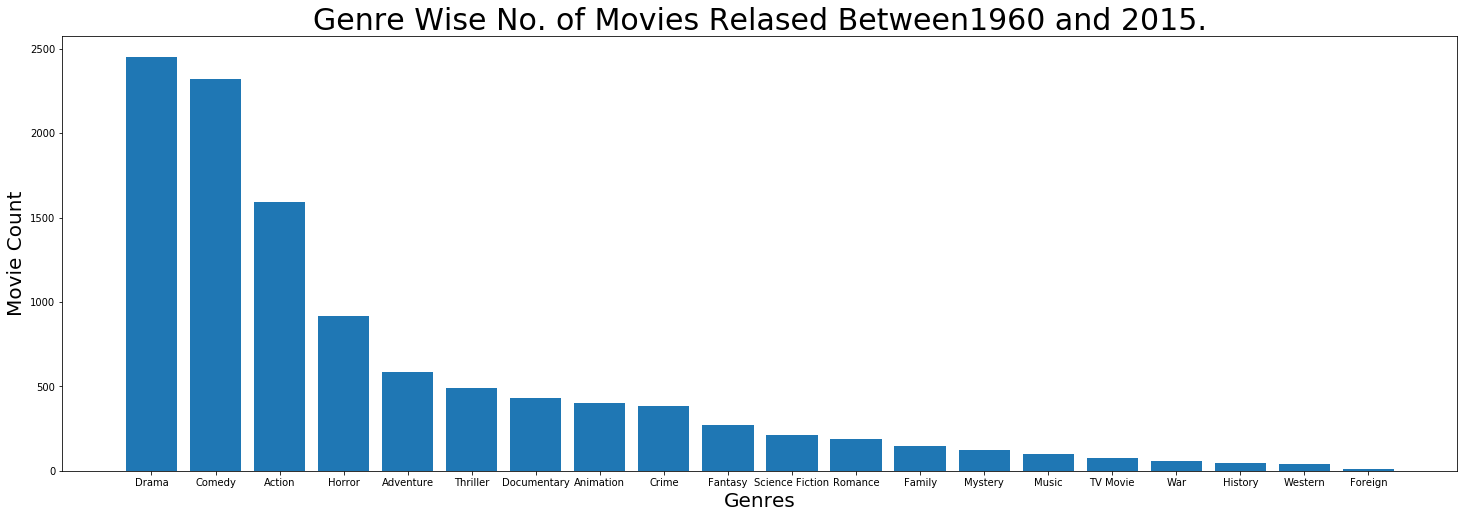

In [97]:
plot_genre(df_flat, 1960, 2015)

#### Finding: Drama, Comedy and Action are three most prolific genres over the years interms of movie releases

> Below bar chart depict number of movies release of each genre over period of 5 years, starting from 1960

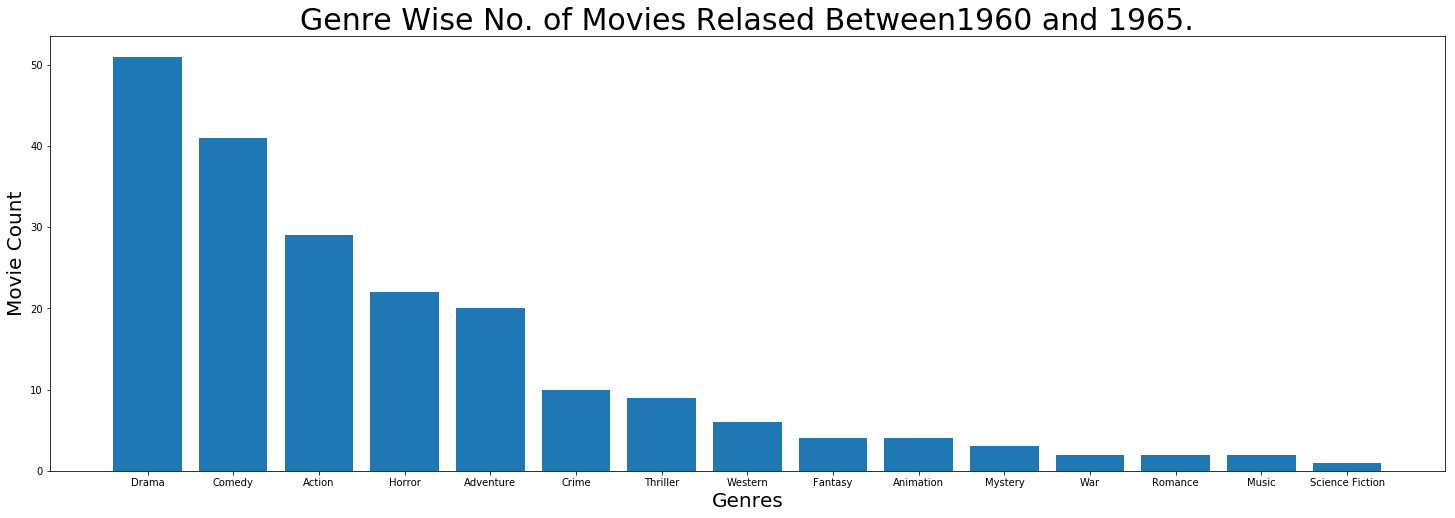

In [99]:
plot_genre(df_flat, 1960, 1965)

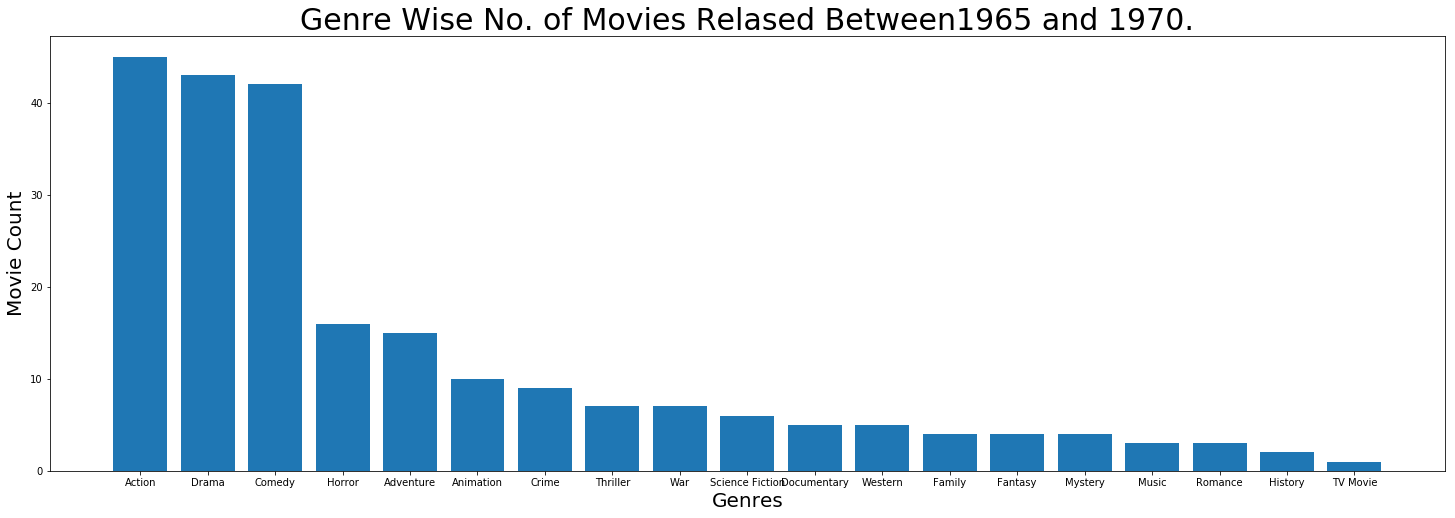

In [101]:
plot_genre(df_flat, 1965, 1970)

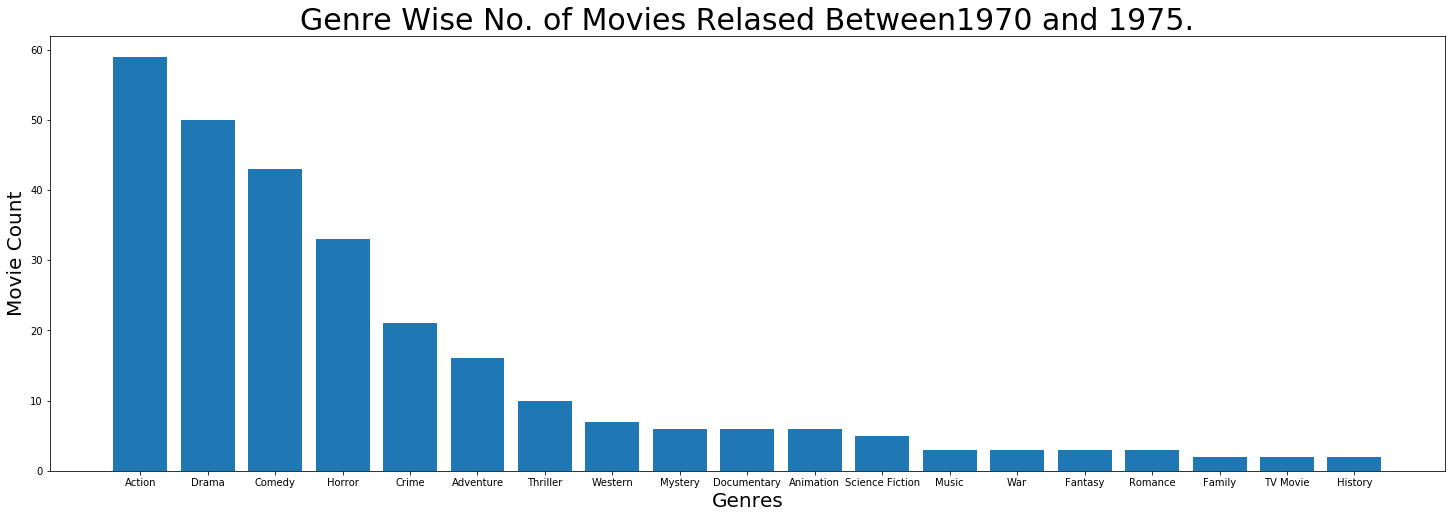

In [100]:
plot_genre(df_flat, 1970, 1975)

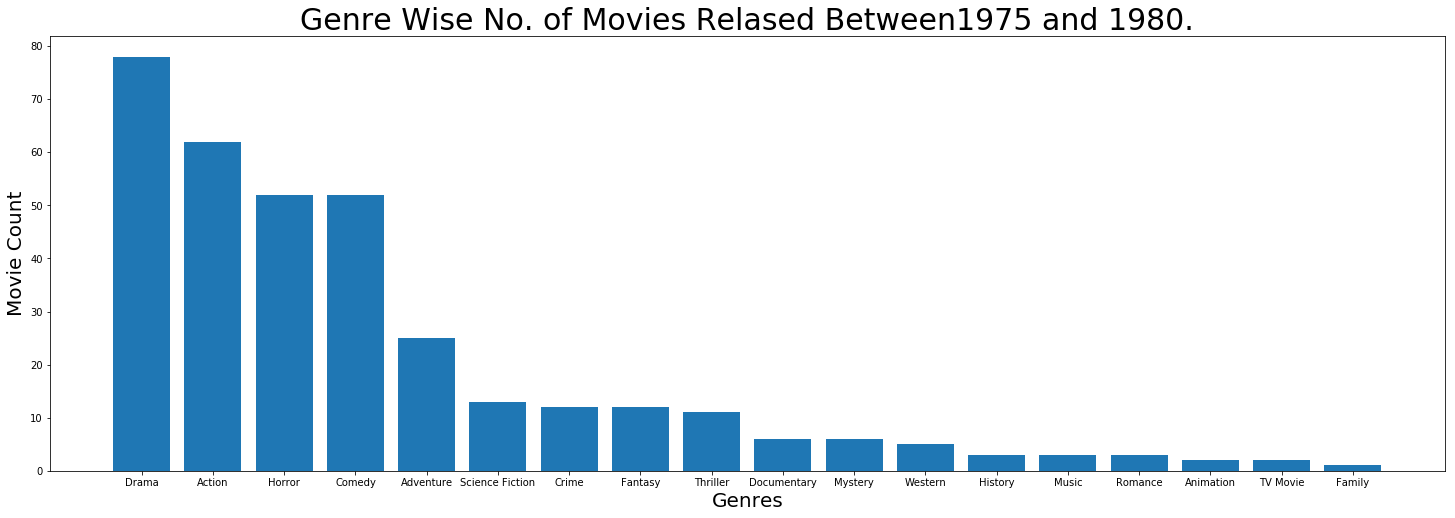

In [102]:
plot_genre(df_flat, 1975, 1980)

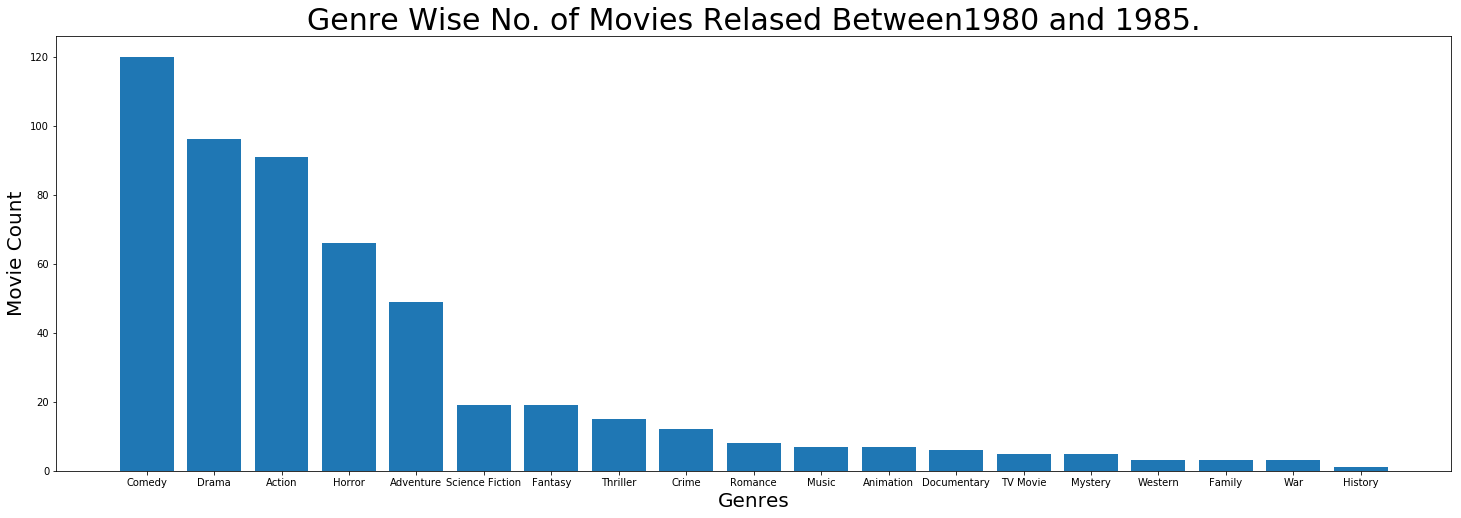

In [103]:
plot_genre(df_flat, 1980, 1985)

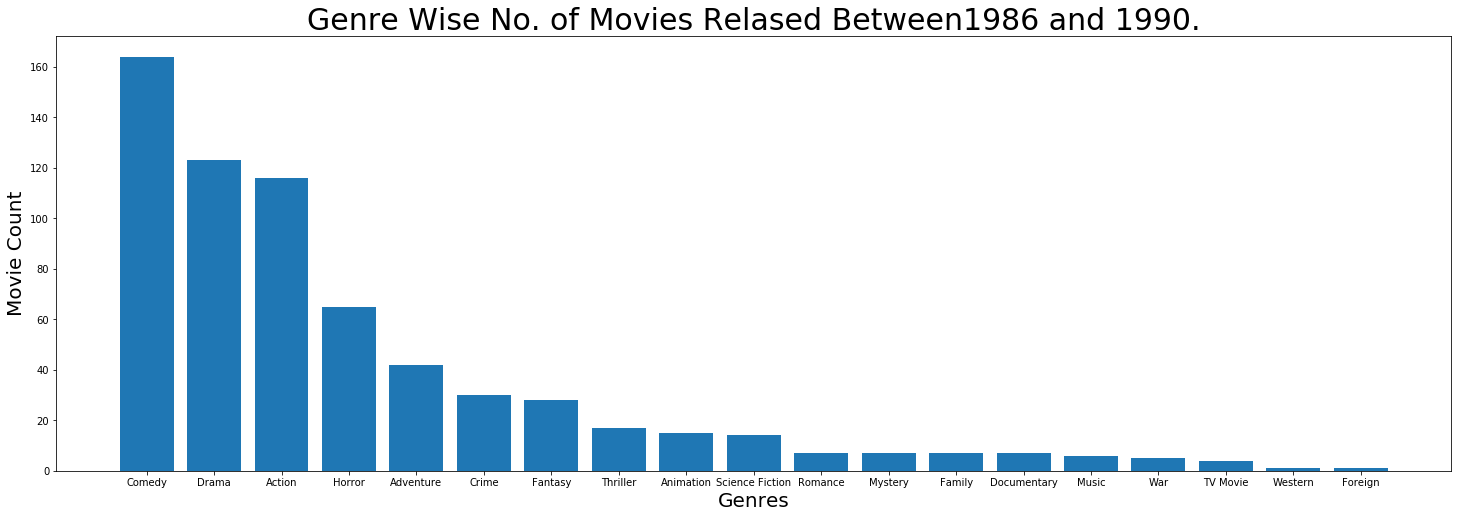

In [105]:
plot_genre(df_flat, 1986, 1990)

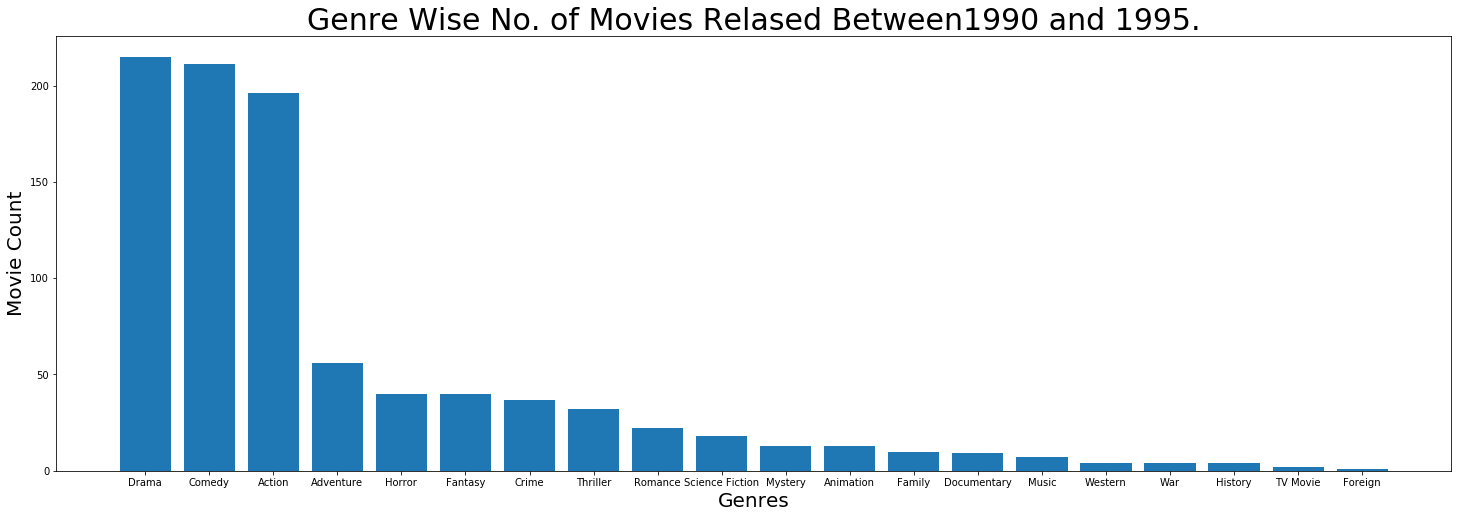

In [106]:
plot_genre(df_flat, 1990, 1995)

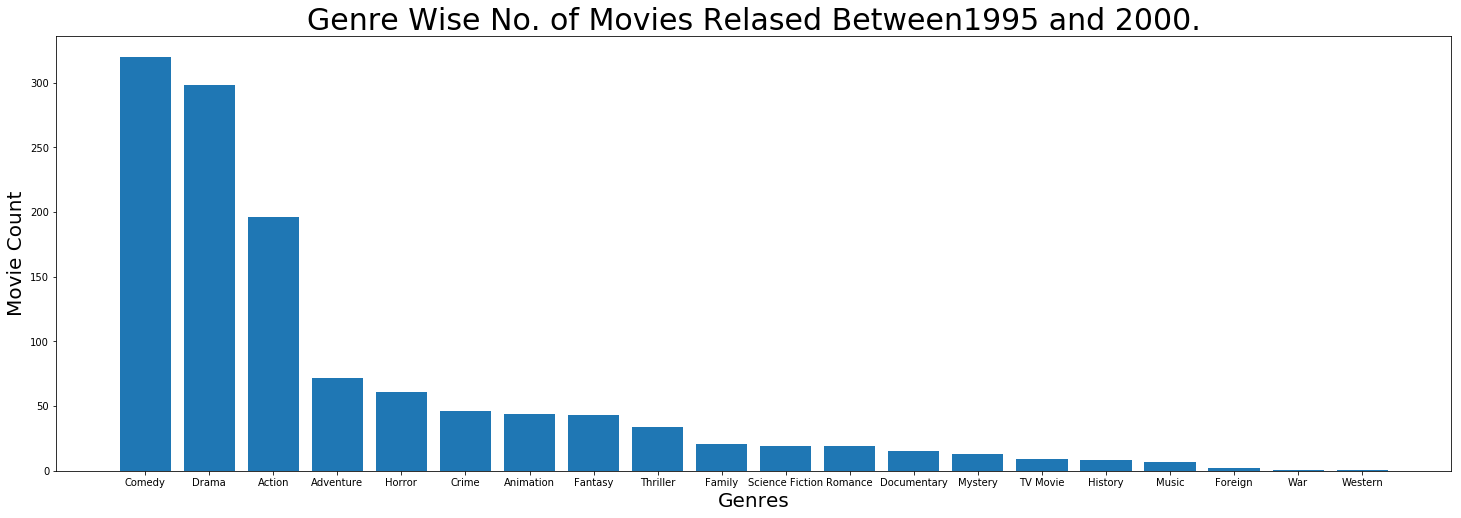

In [107]:
plot_genre(df_flat, 1995, 2000)

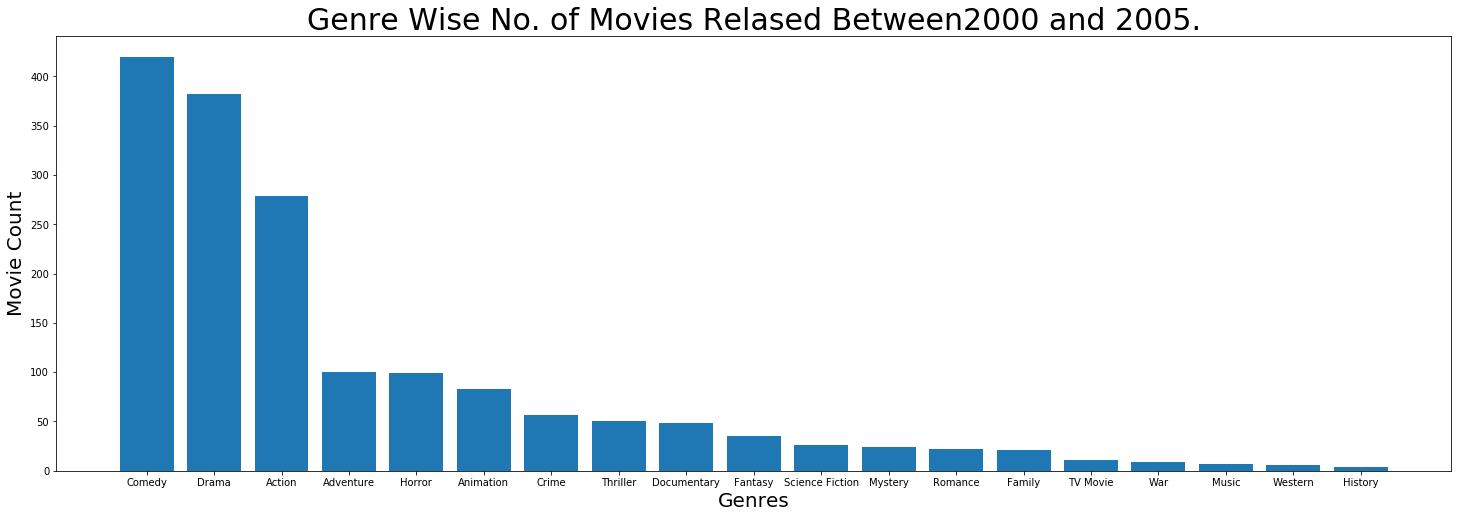

In [108]:
plot_genre(df_flat, 2000, 2005)

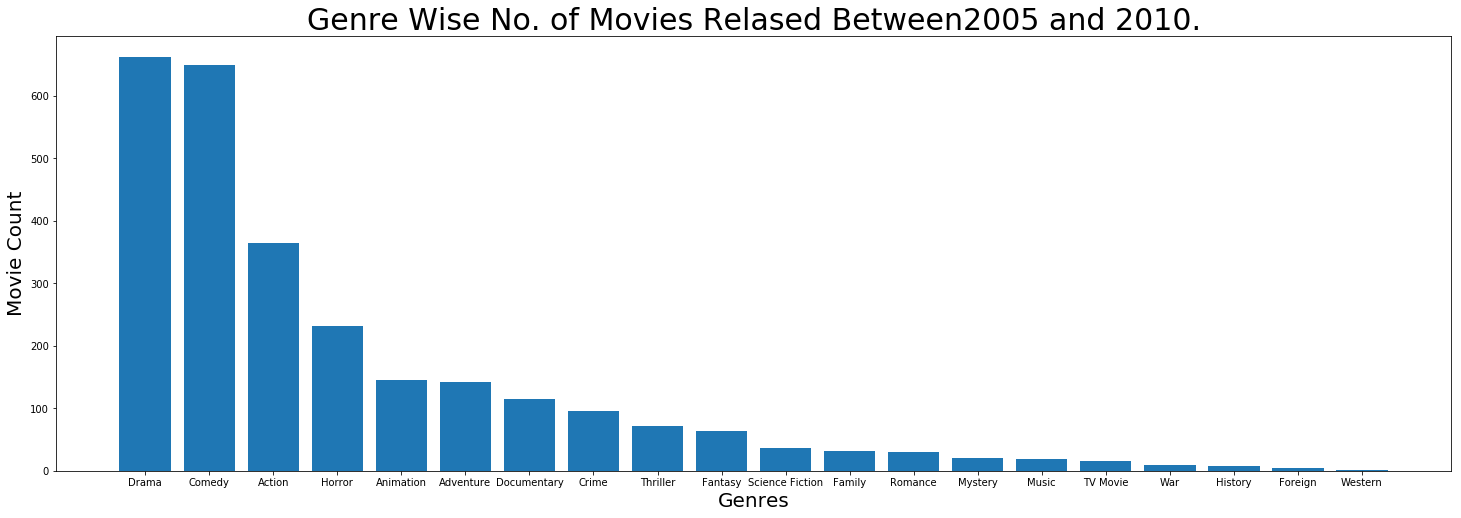

In [109]:
plot_genre(df_flat, 2005, 2010)

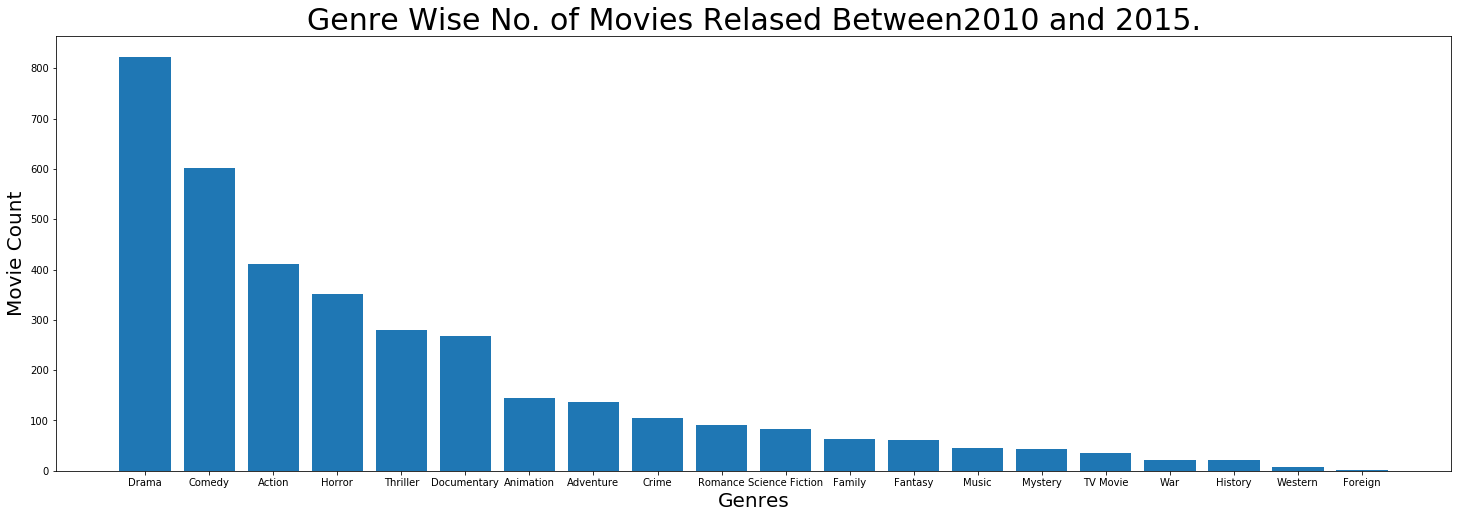

In [110]:
plot_genre(df_flat, 2010, 2015)

#### Findings:
> Drama, Comedy and Action have been top three genres over the years, in terms of number of movies release in that genre

In [94]:
#df_flat.groupby('genre_0')['popularity'].mean().sort_values(ascending=False) 

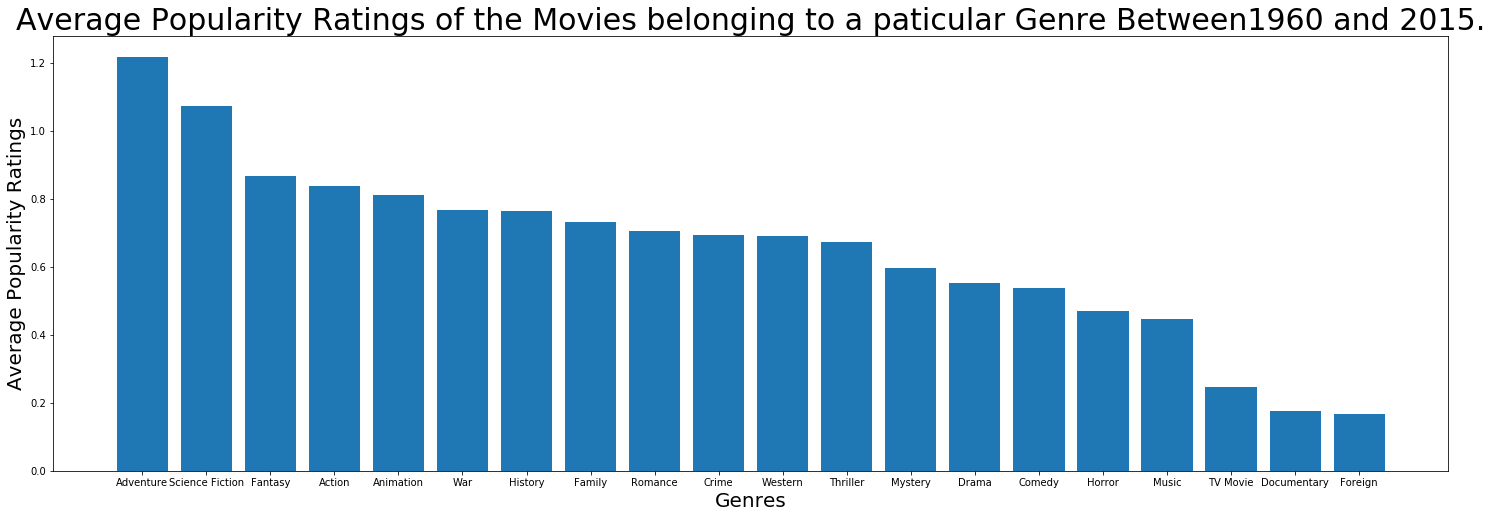

In [48]:
plot_popularity(df_flat, 1960, 2015)

####  Finding
> Average popularity rating of genre Adventure, Science Fiction and Fantasy are top 3 respectively

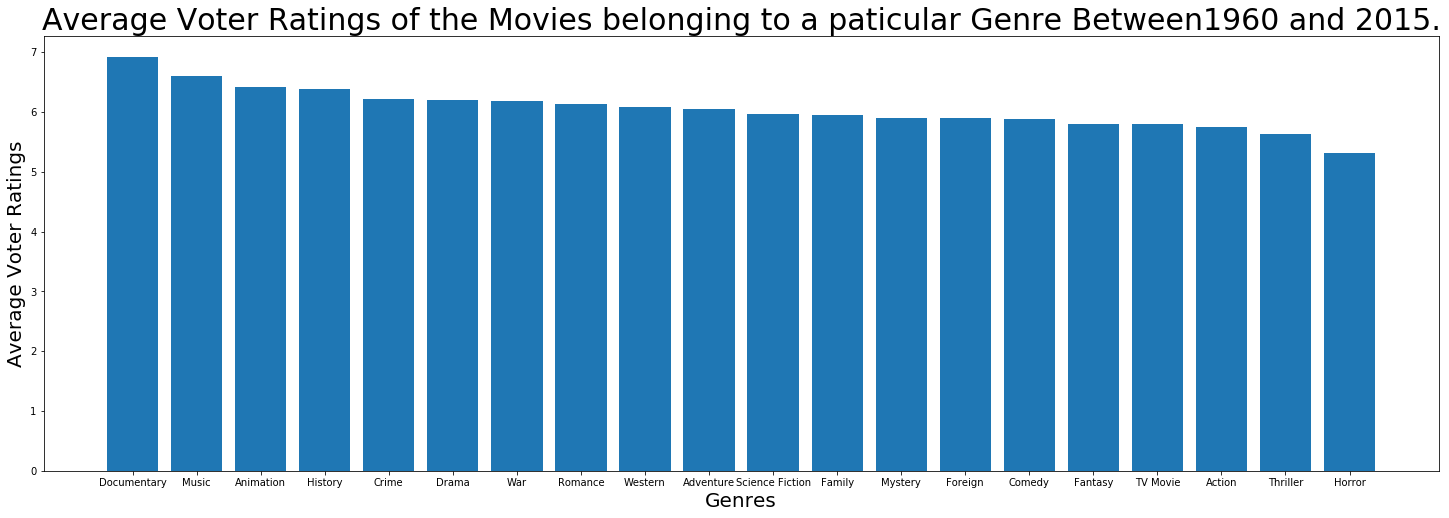

In [49]:
plot_vote_average(df_flat, 1960, 2015)

####  Finding
> Documentary, Music, and animation area top 3 Genres according to Voter Ratings

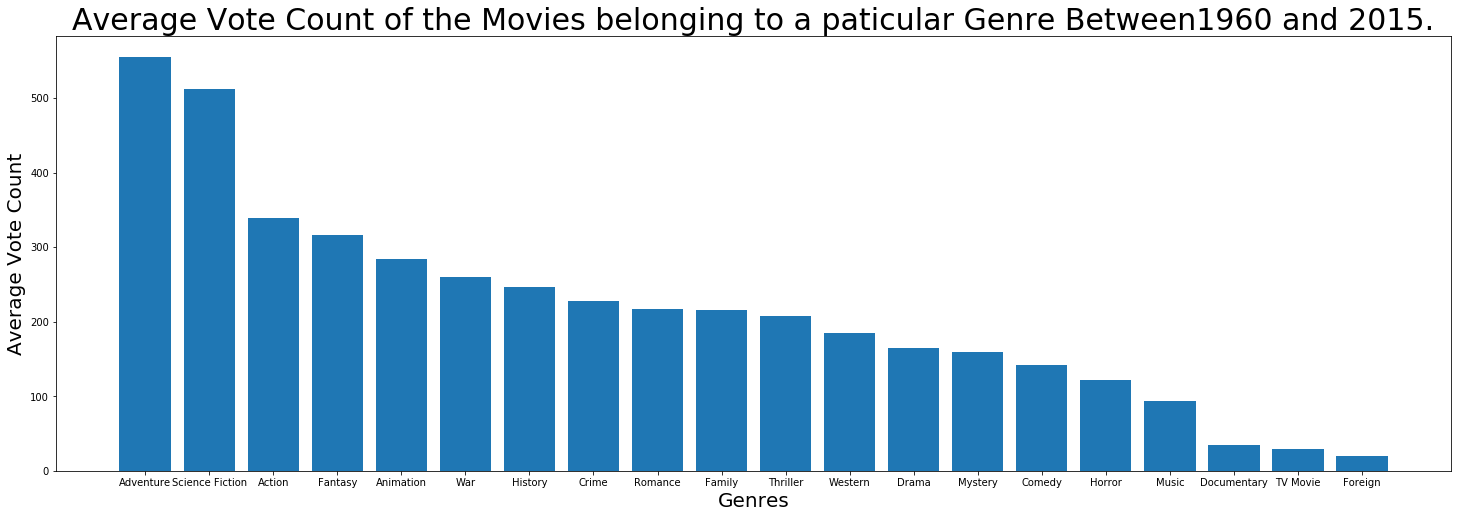

In [50]:
plot_vote_count(df_flat, 1960, 2015)

#### Finding
>Average Voter Counts has remained highest for Adventure, Science Fiction, and Action Genres

Text(0, 0.5, 'Vote Average')

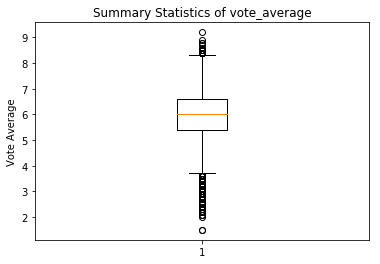

In [51]:
plt.boxplot(df_flat['vote_average']);
plt.title("Summary Statistics of vote_average")
plt.ylabel('Vote Average')

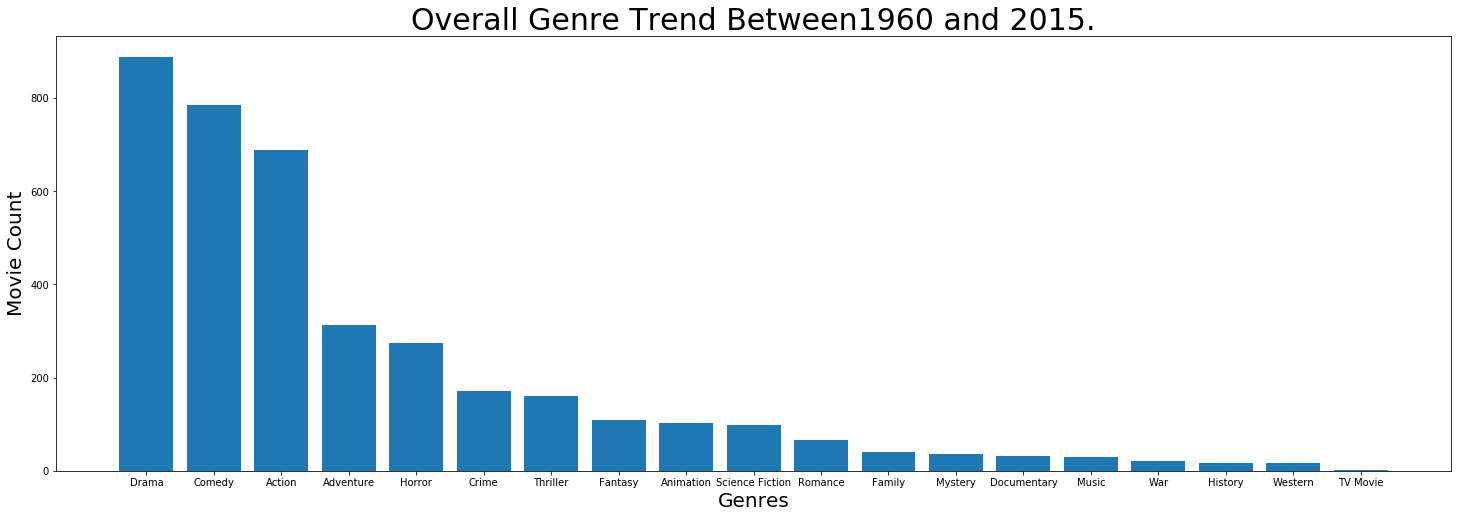

In [53]:
# Genre trend of movies reporting profit information
plot_genre(df, 1960, 2015)

## Exploring Question No. 2. 
> What kinds of properties are associated with movies that have high profit?

> Which genre has earned more profit 

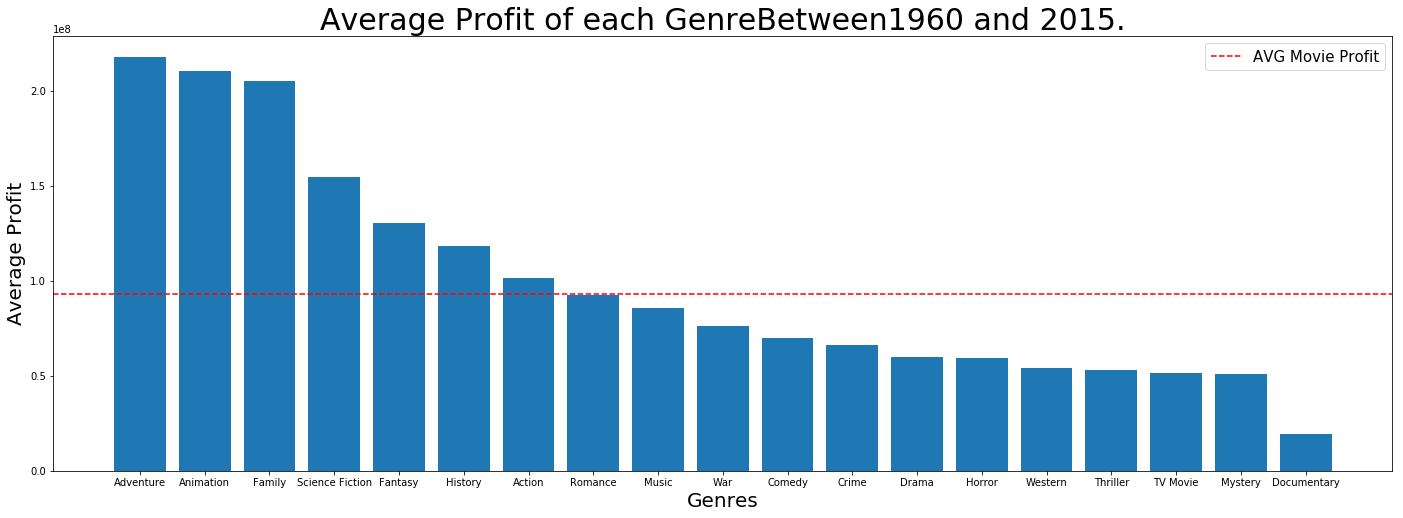

In [54]:
plot_genre_profit(df, 1960, 2015)

### Finding:
> Historically, genres i.e., Adventure, Animation, Family, Science Fiction, Horror and Action have yieled profit above the industrial movie profit average
>
>**CONCLUSION:**Therefore we can say Genre selection impacts the profitability of the movie

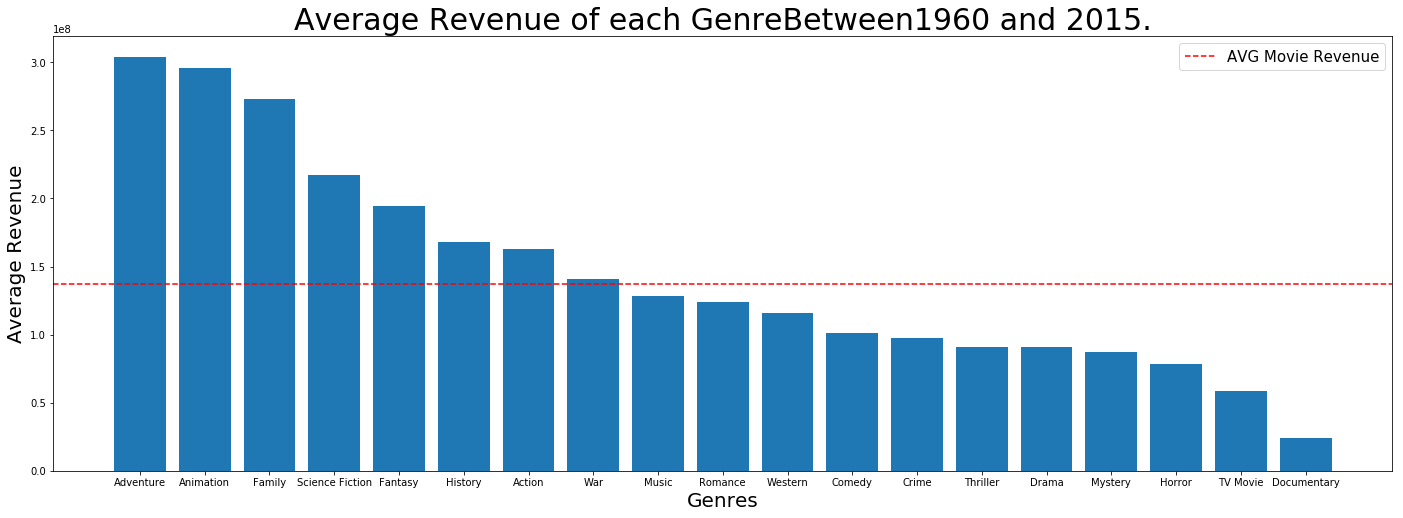

In [116]:
plot_genre_revenue(df, 1960, 2015)

>Exploring: **Correlations** of quantitative variables with profit of the movie

In [55]:
df.columns


Index(['id', 'popularity', 'original_title', 'homepage', 'director', 'runtime',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4',
       'cast_0', 'cast_1', 'cast_2', 'cast_3', 'cast_4', 'keyword_0',
       'keyword_1', 'keyword_2', 'keyword_3', 'keyword_4', 'prod_com_0',
       'prod_com_1', 'prod_com_2', 'prod_com_3', 'prod_com_4', 'profit'],
      dtype='object')

In [56]:
df['popularity'].corr(df["profit"])

0.5167456354446441

In [57]:
df['runtime'].corr(df["profit"])

0.23574170314574117

In [58]:
df['vote_count'].corr(df["profit"])

0.6139816153782963

In [59]:
df['vote_average'].corr(df["profit"])

0.2886780342562979

In [60]:
df['budget_adj'].corr(df["profit"])

0.40413304235288144

### Finding:
> Popularity has reasonable correlation with profit(0.51)
>
> Strangely vote count has strong correlation wiht profit (0.61)
>
> Budget also has moderate correlation with the profit (0.4)
>
>**CONCLUSION:** Therefore we can say popularity and budget are positively correlated with profit of the movie

>**Exploring** Director's role in the profitability of the movie

In [61]:
directors = df.groupby('director').sum()['profit'].sort_values(ascending=False)
directors.head(20).index


Index(['Steven Spielberg', 'James Cameron', 'George Lucas', 'Peter Jackson',
       'Robert Zemeckis', 'Chris Columbus', 'Michael Bay', 'David Yates',
       'Tim Burton', 'Christopher Nolan', 'Roland Emmerich', 'Ron Howard',
       'J.J. Abrams', 'Gore Verbinski', 'Sam Raimi', 'Guy Hamilton',
       'Clint Eastwood', 'Ridley Scott', 'Francis Lawrence', 'Richard Donner'],
      dtype='object', name='director')

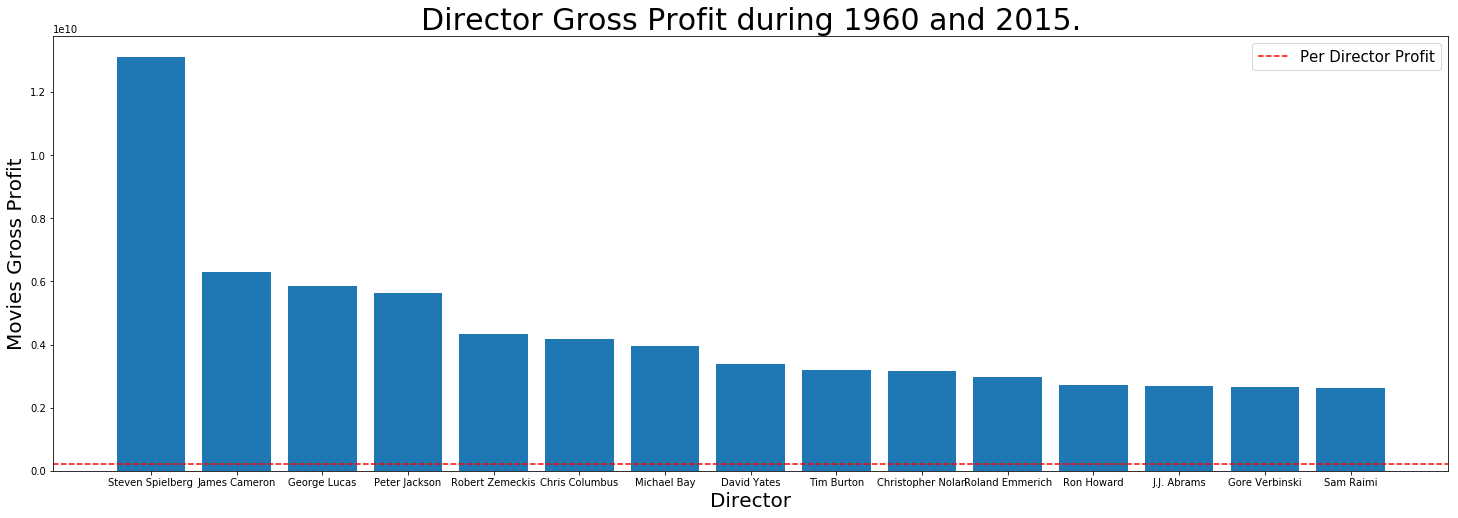

In [63]:
plot_director_gross(df, 1960, 2015, 15)

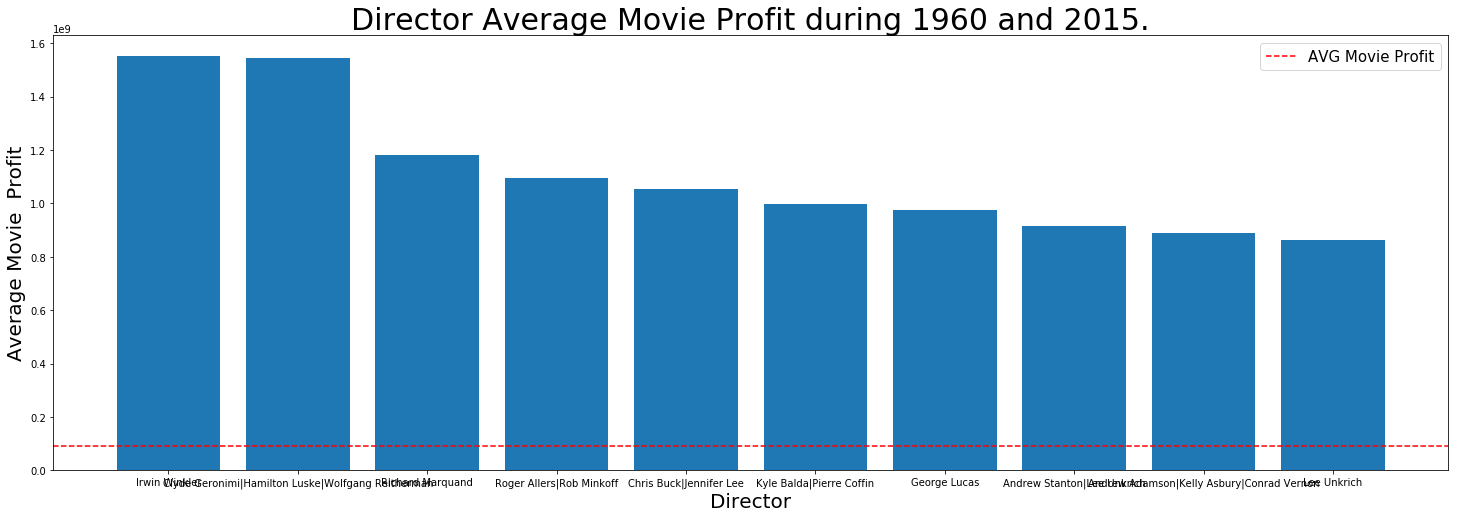

In [64]:
plot_director_avg(df, 1960, 2015, 10)

### Finding:
> Director is significant predictor of the profit of the movies Top 10% of directors' movies have grossed 58% of the total profit
>
>**CONCLUSION:** Therefore we can say certain director's movies are more likely to generate profit than others 

In [ ]:
df.groupby('director').sum()['profit'].sort_values(ascending=False)

>**Exploring** Actor's''s role in the profitability of the movie

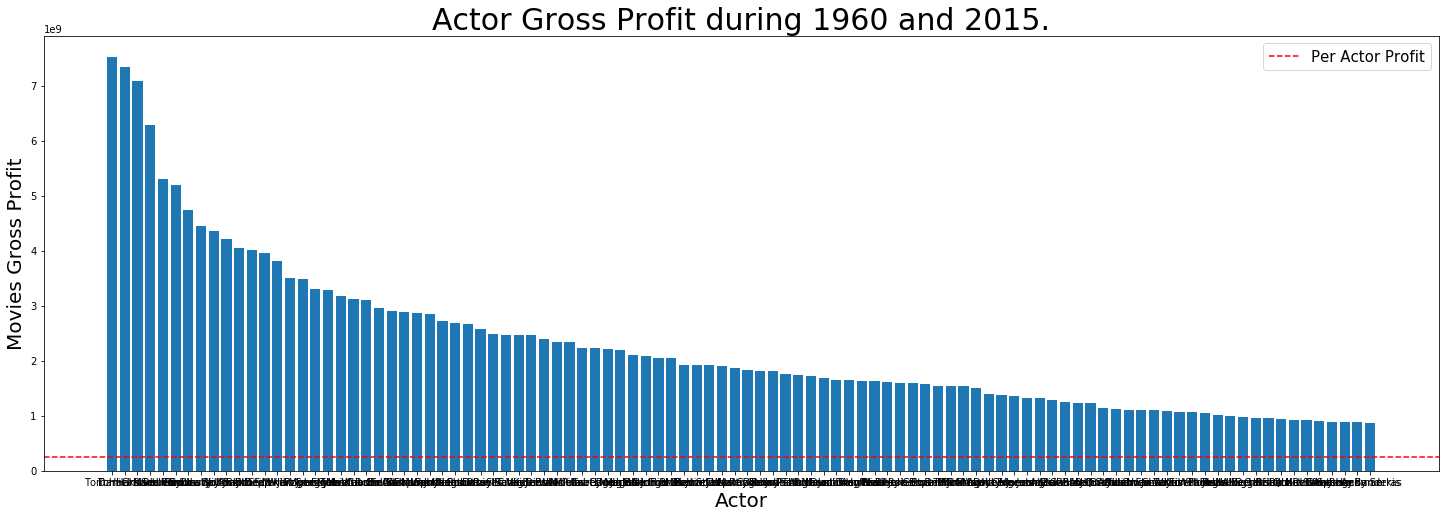

In [77]:
plot_actor_gross(df, 1960, 2015, 100)

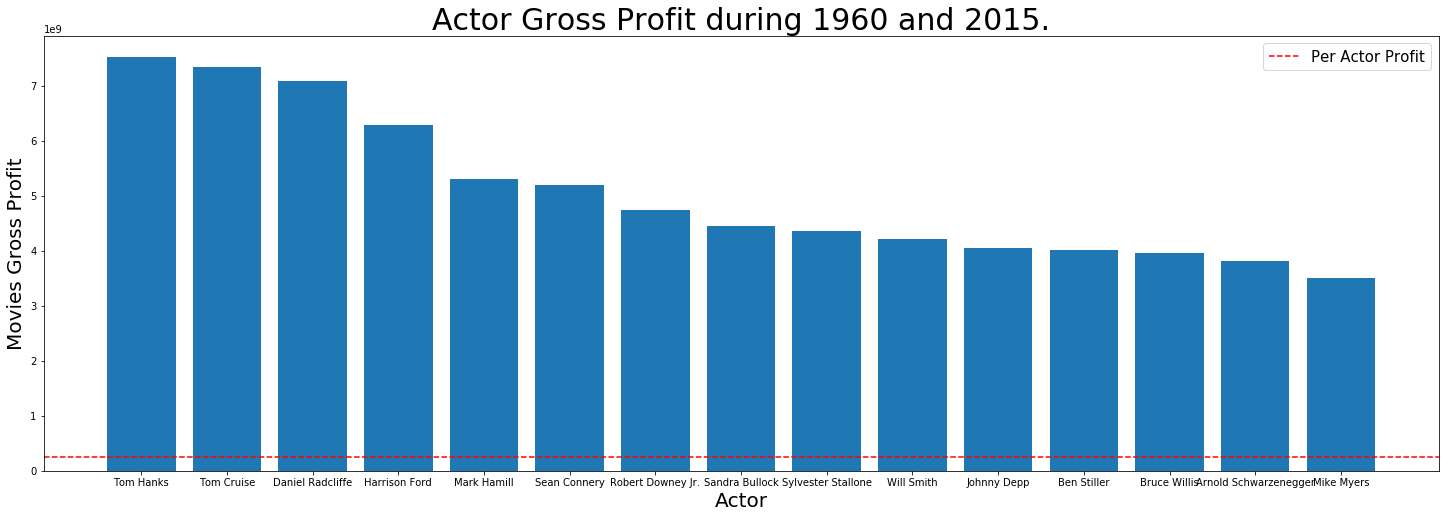

In [78]:
plot_actor_gross(df, 1960, 2015, 15)

In [69]:
df['cast_0'].nunique()

1424

In [70]:
#Top 20% actors movies profit proportion to all time all movies profit
df.groupby('cast_0')['profit'].sum().sort_values(ascending=False).head(int(df['cast_0'].nunique()*.2)).sum() / df['profit'].sum()

0.8799776649365826

In [71]:
#Top 10% actors movies profit proportion to all time all movies profit
df.groupby('cast_0')['profit'].sum().sort_values(ascending=False).head(int(df['cast_0'].nunique()*.1)).sum() / df['profit'].sum()

0.7235901400671241

In [72]:
#Bottom 50% actors movies profit proportion to all time all movies profit
df.groupby('cast_0')['profit'].sum().sort_values(ascending=False).tail(int(df['cast_0'].nunique()*.5)).sum() / df['profit'].sum()

-0.0028708990979532866

### Finding:
> Actor is a significant predictor of the profit of the movies Top 10% of actors' movies have grossed 72% of the total profit
>
>Top 20% of actors' movies have grossed 88% of the total profit
>
>Bottom 50% of actors' movies combined together are still in loss 
>
>**CONCLUSION:** Therefore we can say certain actor's movies are more likely to generate profit than others 

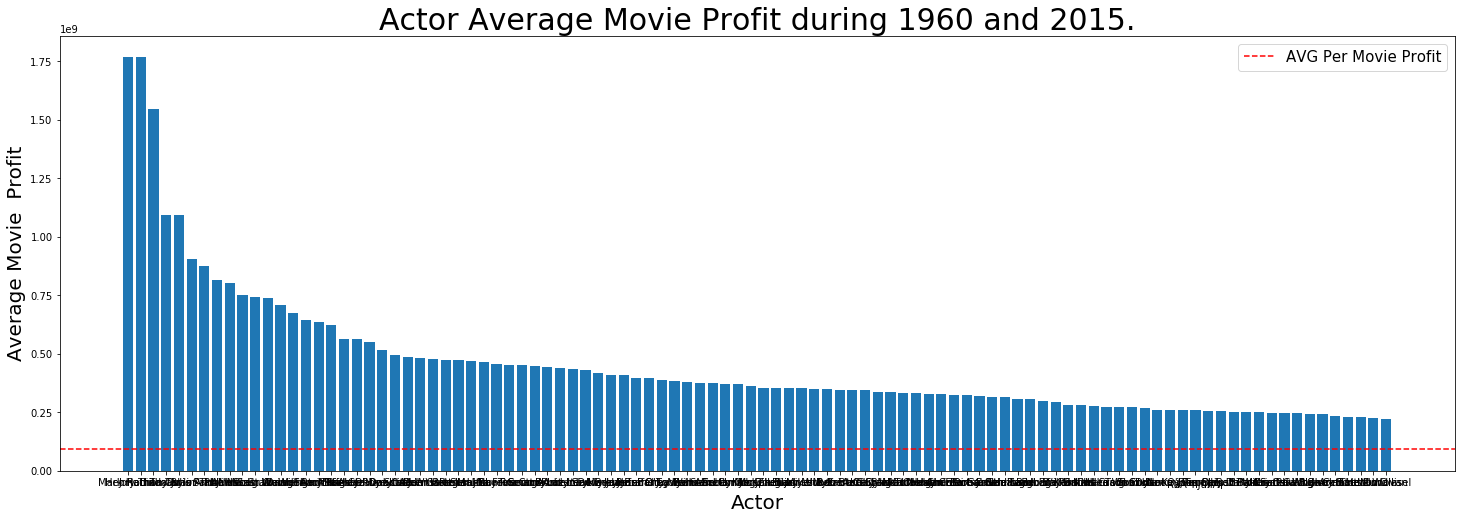

In [79]:
plot_actor_avg(df, 1960, 2015, 100)

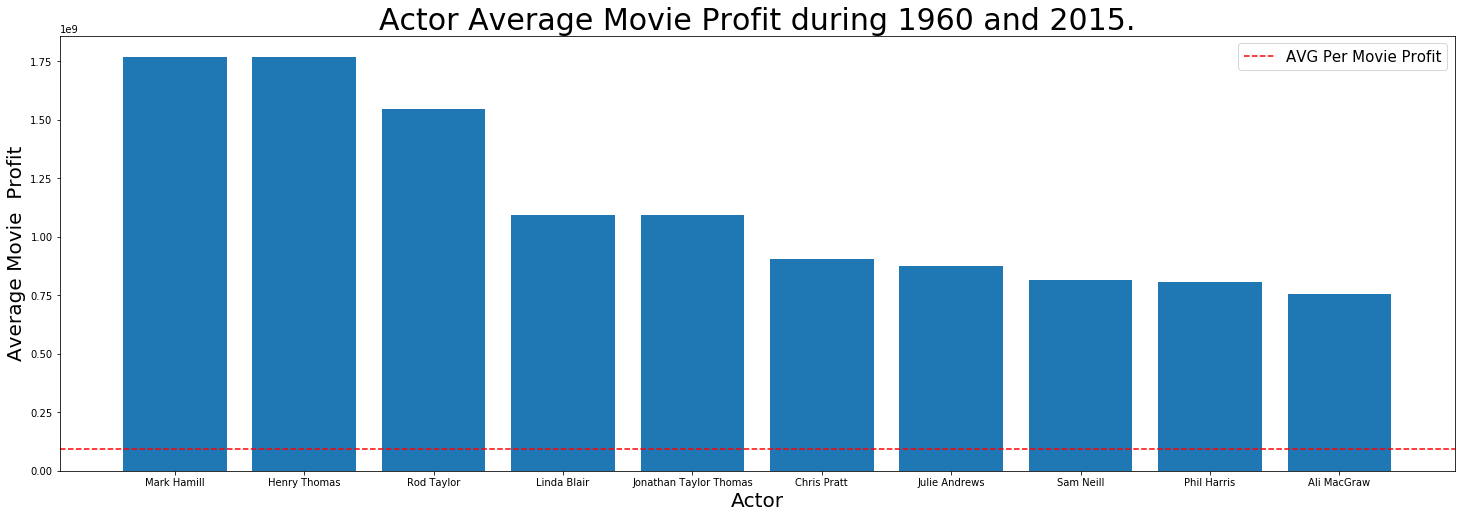

In [80]:
plot_actor_avg(df, 1960, 2015, 10)

In [ ]:
df.groupby('cast_0')['profit'].mean().sort_values(ascending=False).head()

### Finding:
> Actor is a significant predictor of the profit of the movies Top 10% of actors'. This assertion is supported by analysis of avg profit of actors as well
>
>Many actors movie have earned way above the average movie profit
>
>**CONCLUSION:** Therefore we can say certain actor's movies are more likely to generate profit than others 

> **Exploring** keywords Impact on profit of the movie 

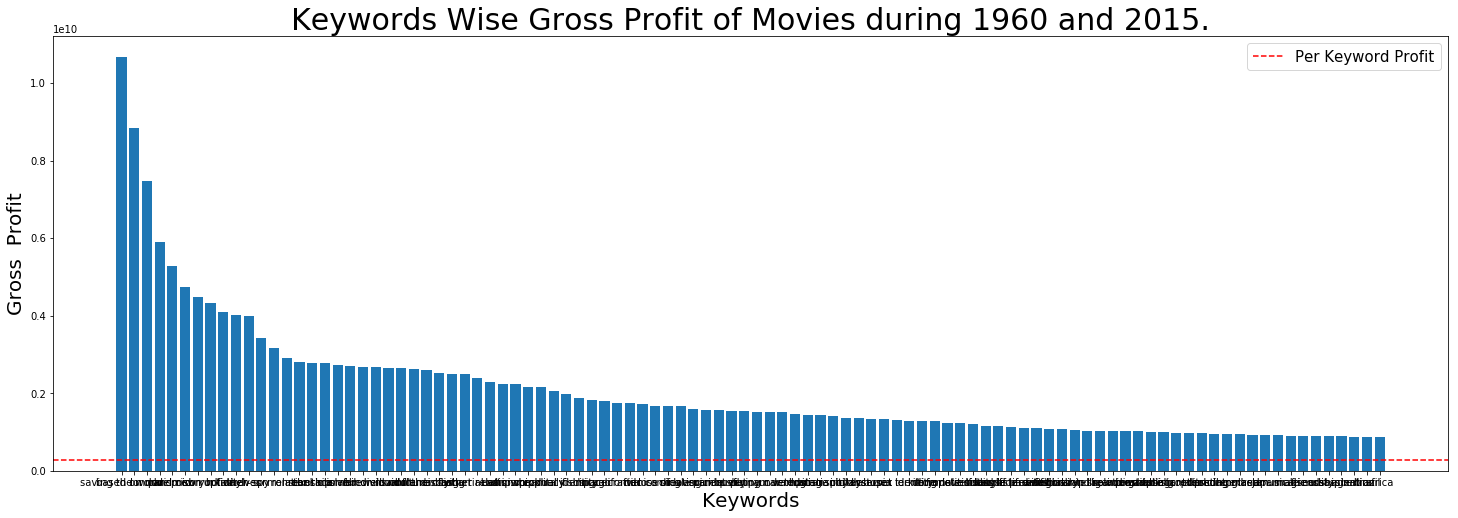

In [119]:
plot_keyword(df, 1960, 2015, 100)

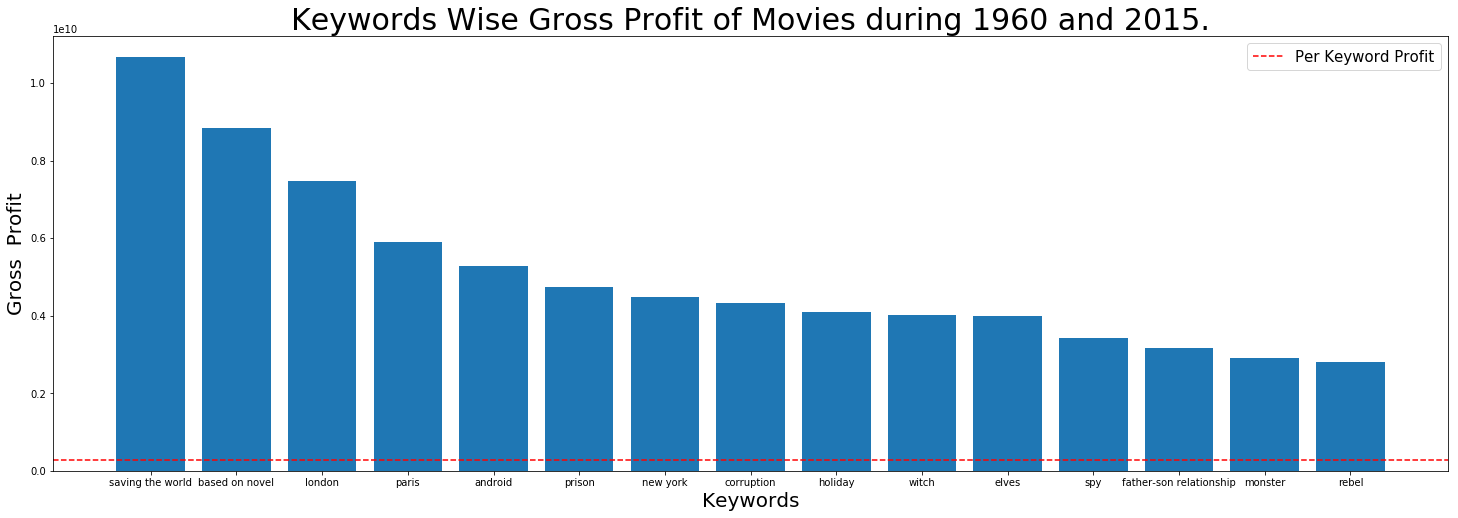

In [118]:
plot_keyword(df, 1960, 2015, 15)


In [86]:
#Top 20% actors movies profit proportion to all time all movies profit
df.groupby('keyword_0')['profit'].sum().sort_values(ascending=False).head(int(df['cast_0'].nunique()*.01)).sum() / df['profit'].sum()

0.2048584020788035

In [87]:
#Top 20% actors movies profit proportion to all time all movies profit
df.groupby('keyword_0')['profit'].sum().sort_values(ascending=False).head(int(df['cast_0'].nunique()*.1)).sum() / df['profit'].sum()

0.6695129852025348

In [88]:
#Top 20% actors movies profit proportion to all time all movies profit
df.groupby('keyword_0')['profit'].sum().sort_values(ascending=False).head(int(df['cast_0'].nunique()*.2)).sum() / df['profit'].sum()

0.8451386559705404

### Finding:
> Keywords represent the theme of the movie and our analysis shows are significant in predicting the profitability of the movie4. 
>
> Top 1% keywords account for 20% profit of the film industry over all time (dataset)
>
> Top 10 keywords account for 67% profit
>
> Top 20 keywords account for 85% profit
>
>**CONCLUSION:** Therefore we can say certain keywords containing movies are more likely to generate profit than others 

> **Exploring** Production Companies Impact on profit of the movie 

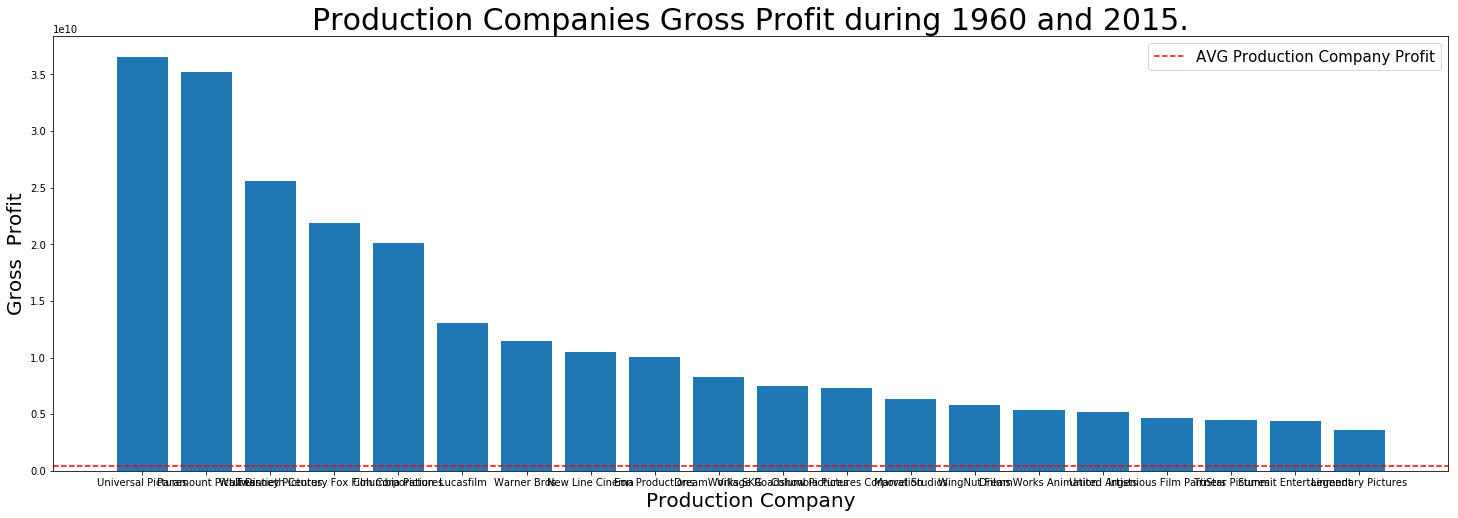

In [89]:
plot_prod_com_gross(df, 1960, 2015, 20)

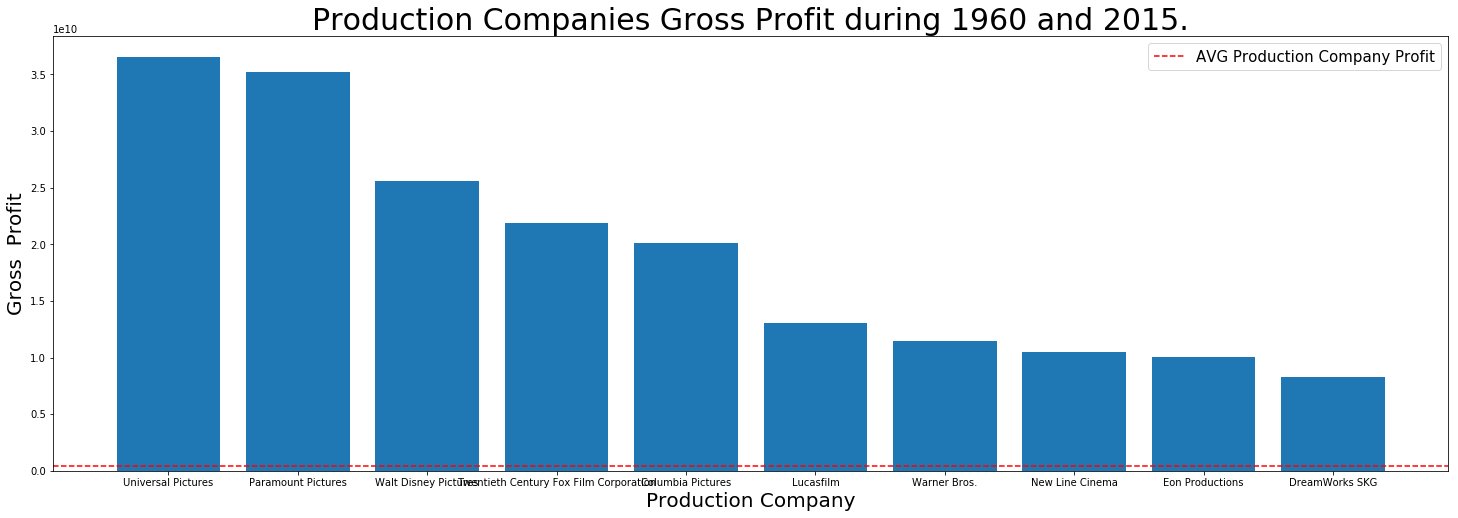

In [90]:
plot_prod_com_gross(df, 1960, 2015, 10)

In [91]:
#Top 1% Production Companyies movies profit proportion to all time all movies profit
df.groupby('prod_com_0')['profit'].sum().sort_values(ascending=False).head(int(df['cast_0'].nunique()*.01)).sum() / df['profit'].sum()

0.6142177718028958

In [92]:
#Top 10% Production Companyies movies profit proportion to all time all movies profit
df.groupby('prod_com_0')['profit'].sum().sort_values(ascending=False).head(int(df['cast_0'].nunique()*.1)).sum() / df['profit'].sum()

0.9577072827785852

In [93]:
#Top 20% Production Companyies movies profit proportion to all time all movies profit
df.groupby('prod_com_0')['profit'].sum().sort_values(ascending=False).head(int(df['cast_0'].nunique()*.2)).sum() / df['profit'].sum()

1.0008583825767923

### Finding:
> Production companies matter in predicting the profitability of the movie4. 
>
> Top 1% Production companies account for 61% profit of the film industry over all time (dataset)
>
> Top 10 Production companies account for 95% profit
>
> Top 20 Production companies account for 100% profit
>
>**CONCLUSION:** Therefore we can say certain production companies movies are more likely to generate profit than others 

<a id='conclusions'></a>
## Conclusions
> In the project following two questions are explored: 
>
>Question No. 1: Which genres are most popular from year to year?
>
>Question No. 2: What kinds of properties are associated with movies that have high profit?


>We have explore first question in following ways:
>1. Genre wise number of movies released
>2. Average popularity of Genre
>3. Average Revenues of the Genre and 
>4. Average Profit of the Genre

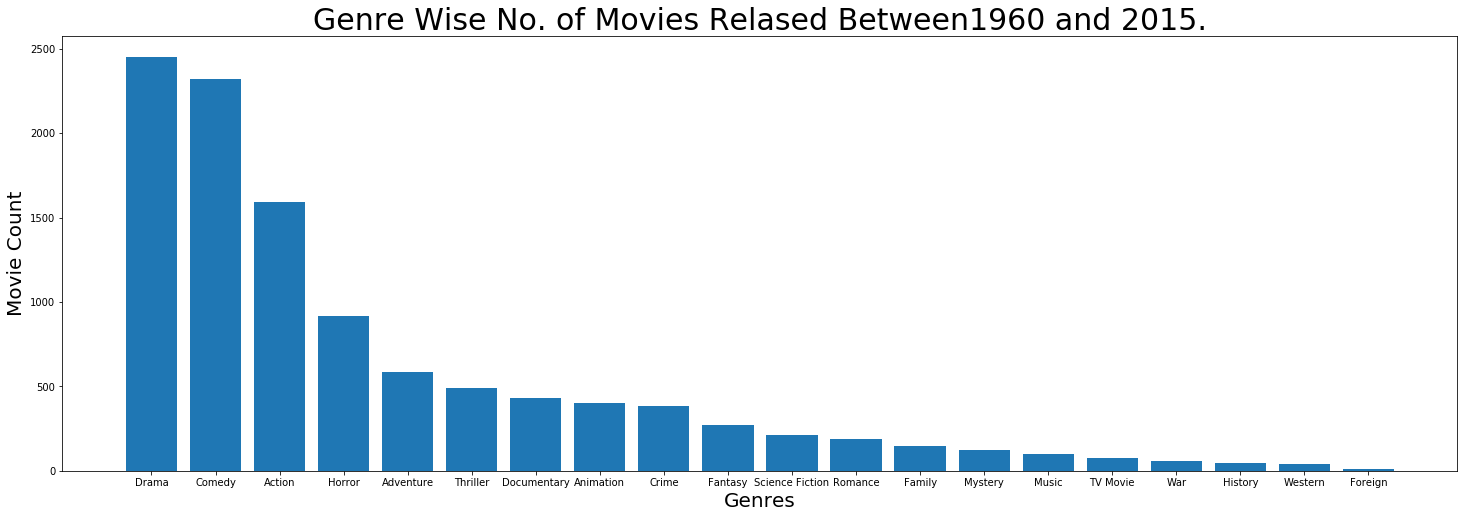

> Drama, Comedy and Action have been most prolific Genres during the time (1960, 2015)

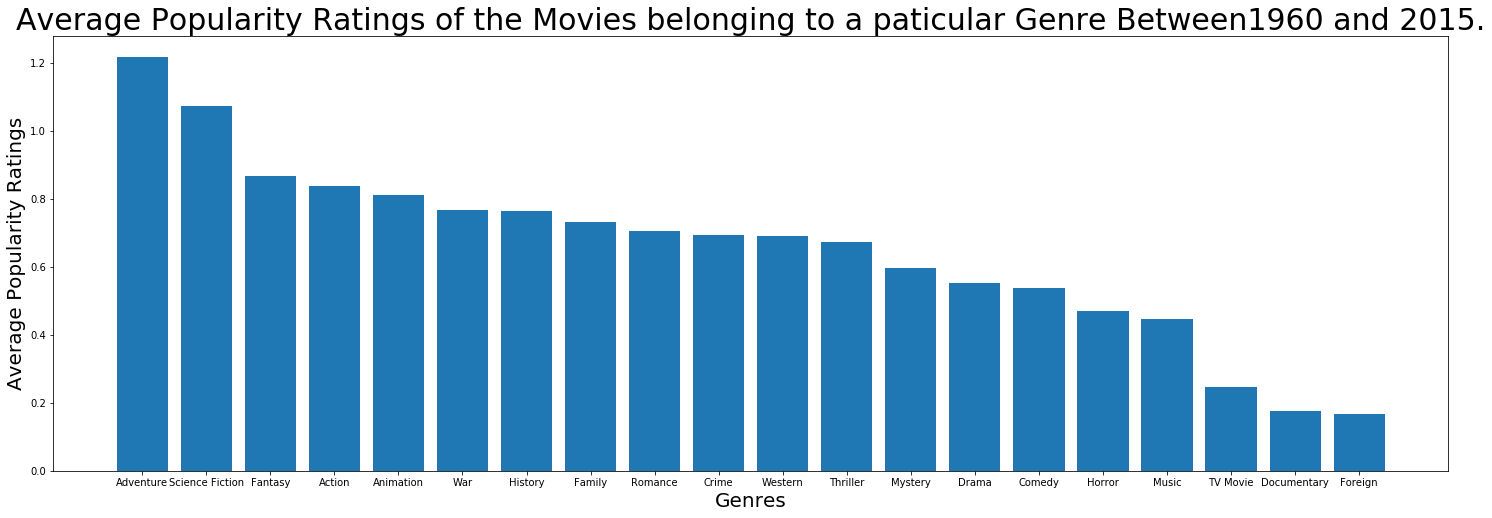

> Popularity Rating wise Adventure, Science Fiction and Fantasy are top three most popular genres 

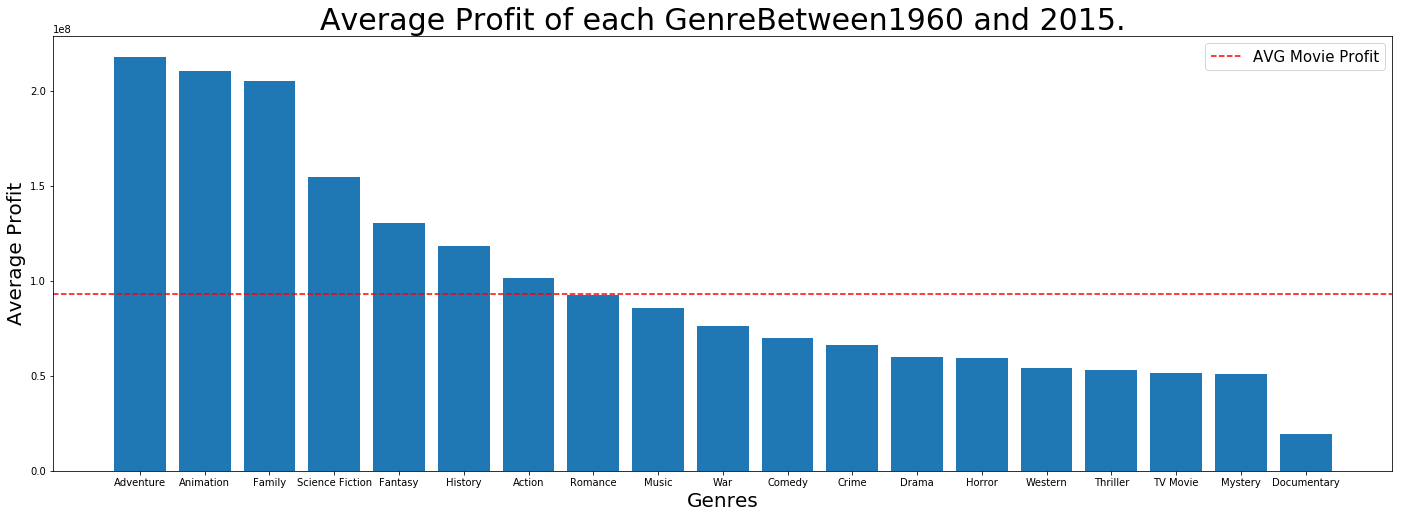

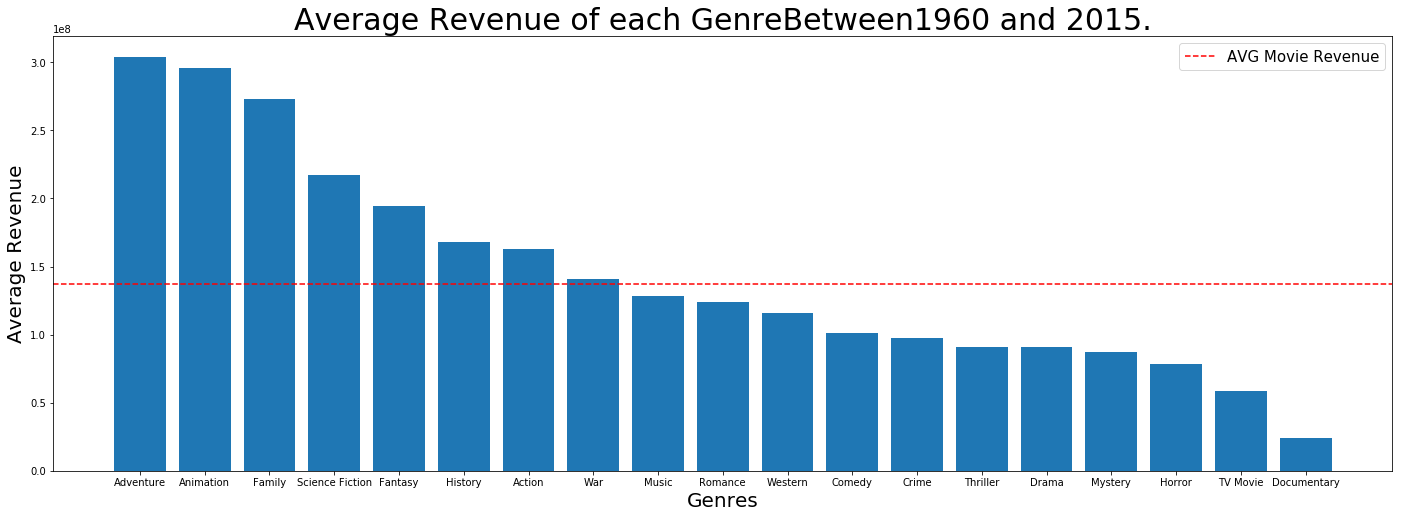

> Profit or Revenue wise genre analysis yields similar results. Adeventure, Animation and Family are top three genres 

> Question No. 2: What kinds of properties are associated with movies that have high profit?
>
> Following variables are analyzed to answer the question 
> 1. Genre
> 2. Director
> 3. Actor
> 4. Production Company
> 5. Keywords
> 6. Furthermore correlation analysis is performed between Popluarity, Budget, Voter Average

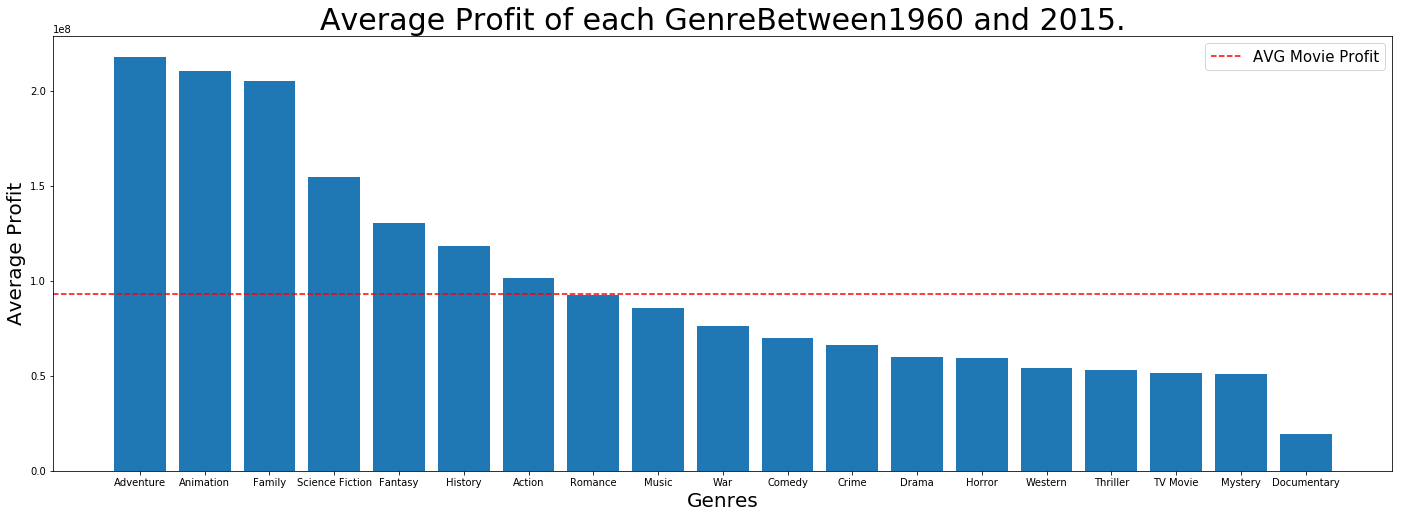

> **Genres** such as Adventure, Animation, Family, Science Fiction, Fantasy, History and Action are more profitable than other genres, historically. 

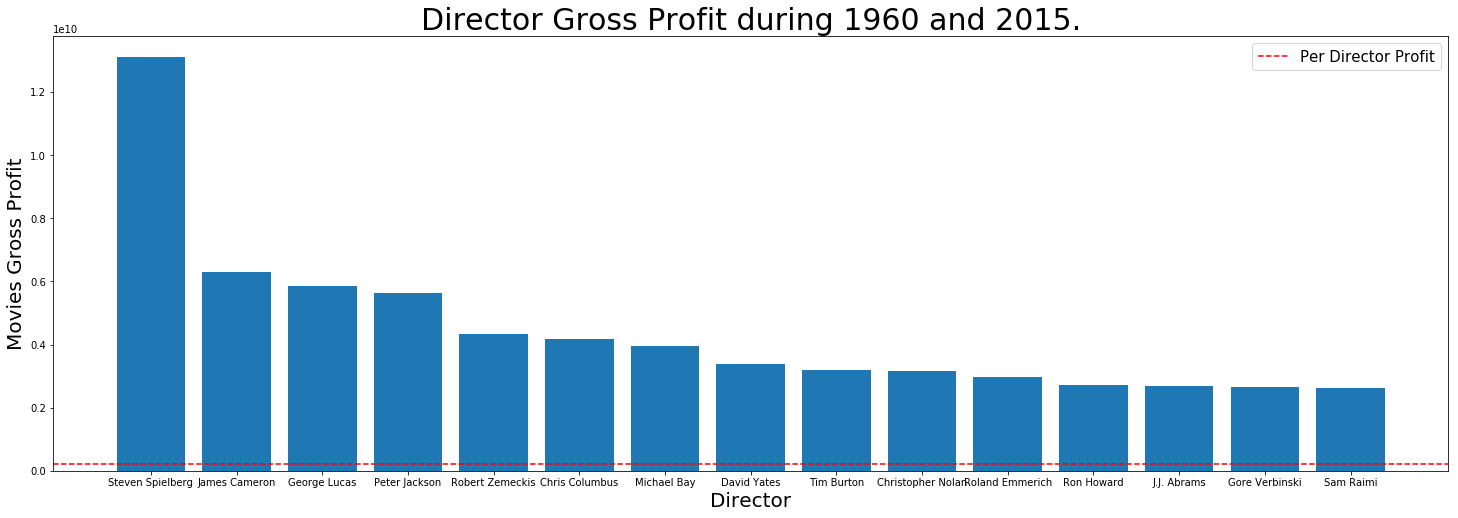

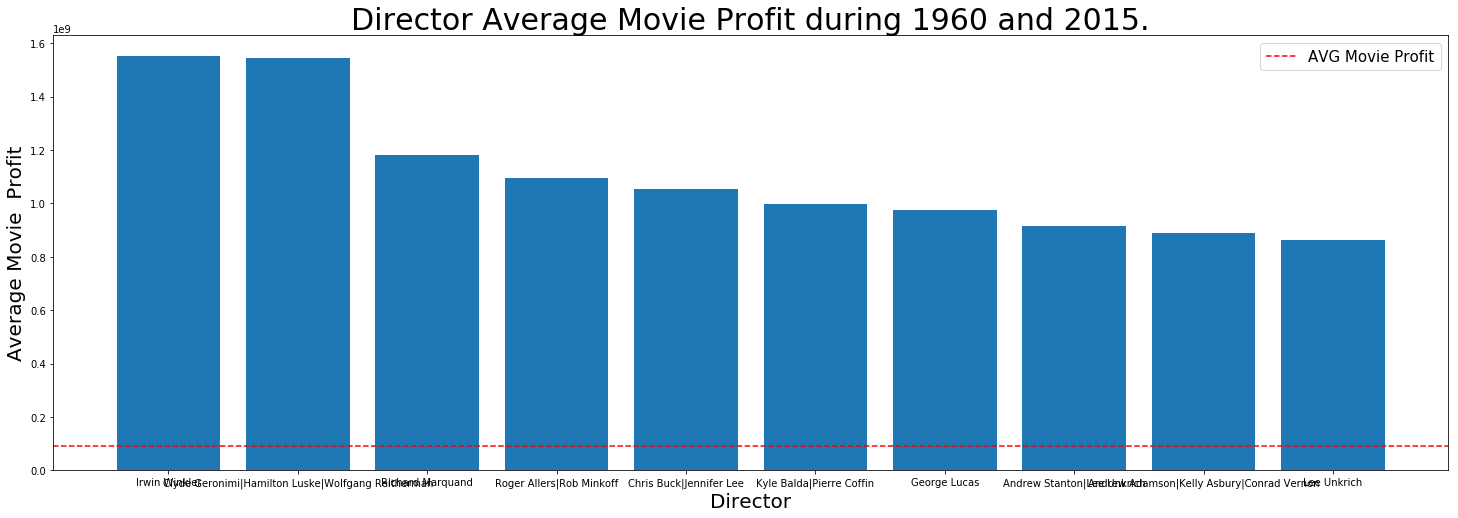

> **Director** is significant predictor of the profit of the movies Top 10% of directors' movies have grossed 58% of the total profit. Therefore we can say certain director's movies are more likely to generate profit than others 

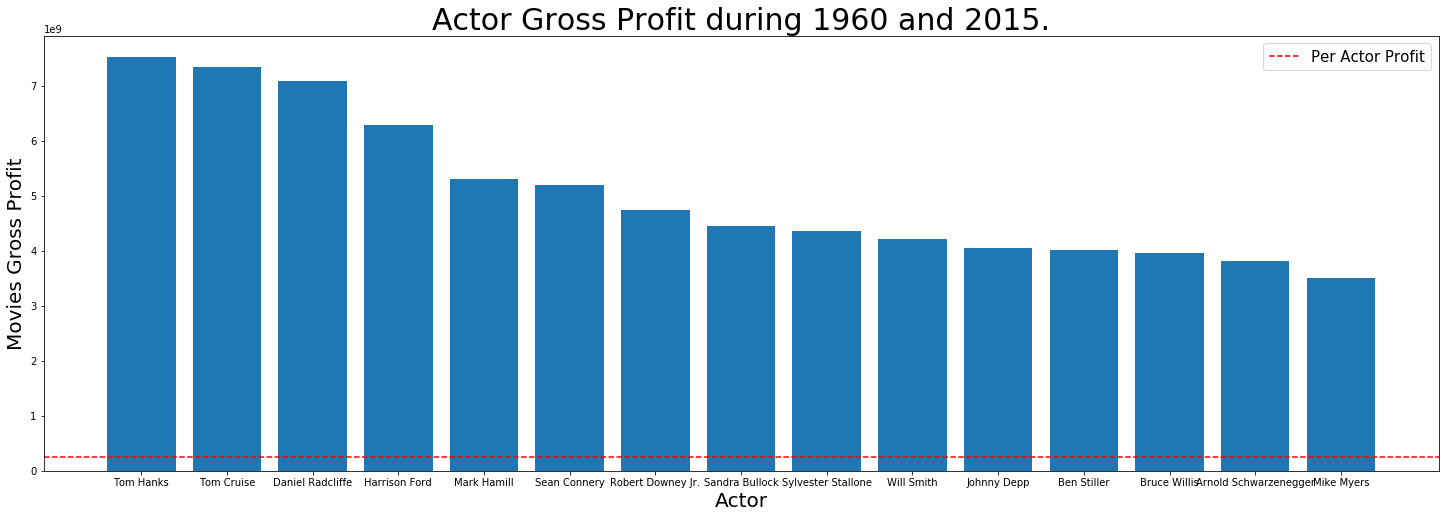

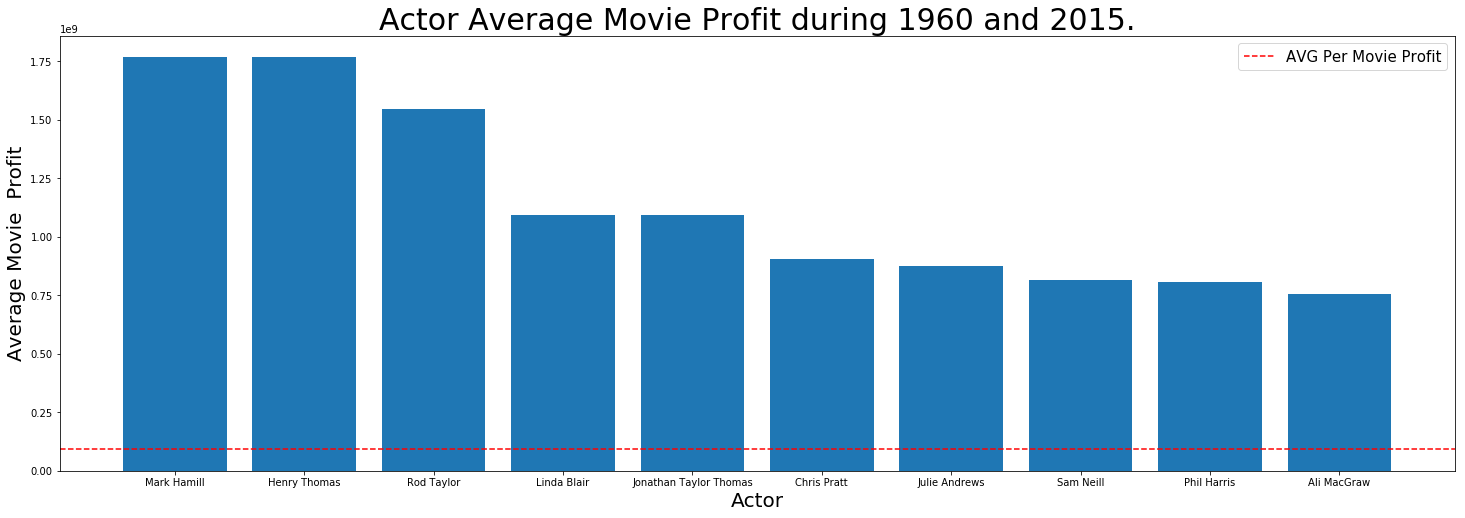

> **Actor** is a significant predictor of the profit of the movies Top 10% of actors' movies have grossed 72% of the total profit
>
>Top 20% of actors' movies have grossed 88% of the total profit
>
>Bottom 50% of actors' movies combined together are still in loss 
>
>Therefore we can say certain actor's movies are more likely to generate profit than others 

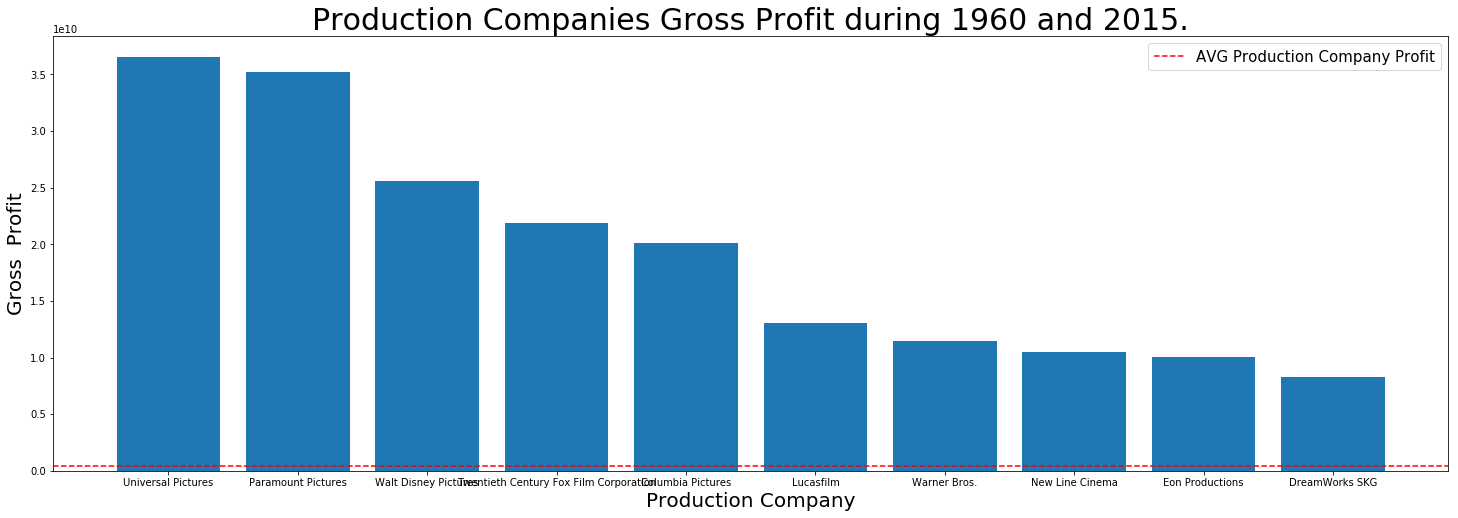

> **Production Companies** matter in predicting the profitability of the movies. 
>
> Top 1% Production companies account for 61% profit of the film industry over all time (dataset)
>
> Top 10 Production companies account for 95% profit
>
> Top 20 Production companies account for 100% profit
>
> Therefore we can say certain production companies' movies' are more likely to generate profit than others 

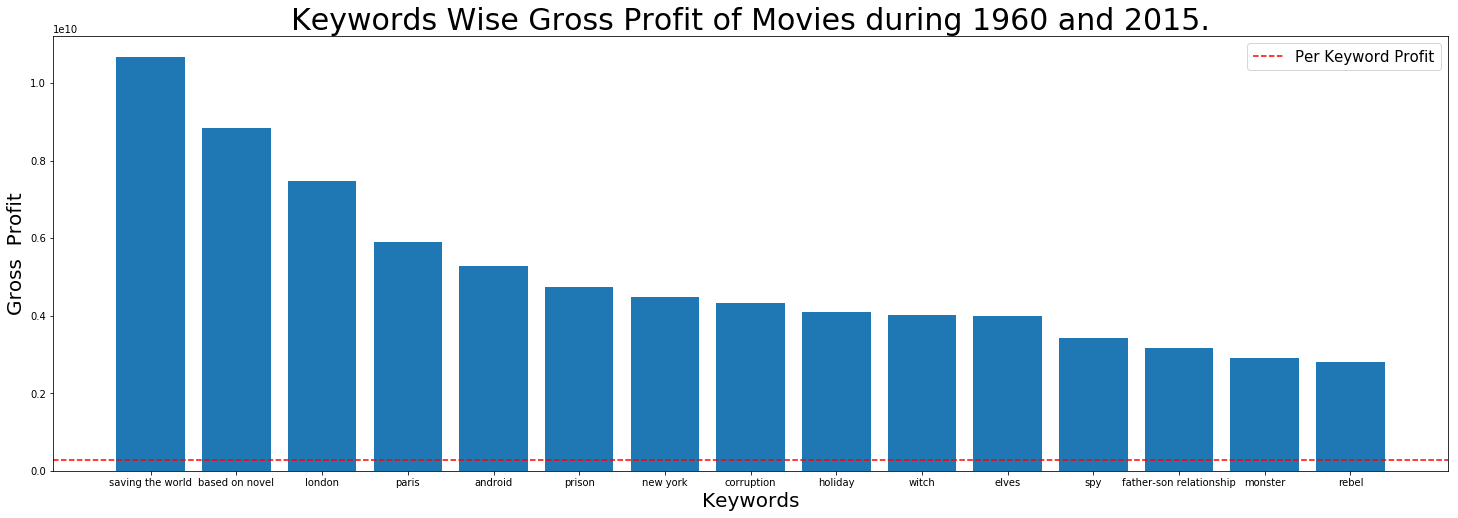

> **Keywords** represent the theme of the movie and our analysis shows are significant in predicting the profitability of the movie4. 
>
> Top 1% keywords account for 20% profit of the film industry over all time (dataset)
>
> Top 10 keywords account for 67% profit
>
> Top 20 keywords account for 85% profit
>
> Therefore we can say certain keywords containing movies are more likely to generate profit than others 

> **Correlation Analysis**
>
> Popularity has reasonable correlation with profit(0.51)
>
> Strangely vote count has strong correlation wiht profit (0.61)
>
> Budget also has moderate correlation with the profit (0.4)
>
> Therefore we can say popularity and budget are positively correlated with profit of the movie